# DASMatrix 开发测试

> DASMatrix 是一个用于处理DAS数据的高性能、可拓展Python库，主要用于处理DAS数据，并提供可视化功能。

In [1]:
%time
%load_ext autoreload
import os
import sys

# 添加父目录到 Python 路径，这样就可以导入 DASMatrix 包
sys.path.insert(0, os.path.abspath(".."))

# 现在可以使用正常的导入语句
from DASMatrix import DASProcessor, DASReader, DASVisualizer, SamplingConfig


CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 6.91 μs


In [2]:
# 正确导入必要的类
from pathlib import Path

# 配置采样参数
sampling_config = SamplingConfig(
    fs=30000,  # 采样频率30kHz
    channels=20,  # 通道数量
    byte_order="big",  # 大端字节序
    wn=0.5,  # 高通滤波截止频率
)

# 创建数据读取器和处理器
data_reader = DASReader(sampling_config)
data_processor = DASProcessor(sampling_config)

# 设置数据文件路径
dat_path = Path(
    "/Users/qianlong/联河光子/Projects/光纤探头测试/20250410-DAS2k/Tantou/silent/2m/CH1_Fs30k_Col20_30s_20250410_DAS2k_Double(1).dat"
)

# 读取原始数据 - 在优化后的API中，target_col是一个可选参数，用于选择特定的列
# output_cols参数在优化后变为target_col
target_cols = list(range(20))  # 从0到20的列 (如果需要0-20这21列)

# 读取原始数据
raw_data = data_reader.ReadRawData(dat_path, target_col=target_cols)

# 使用处理器获取差分和积分数据
diff_data = data_processor.ProcessDifferential(raw_data)
int_data = data_processor.IntegrateData(raw_data)


In [3]:
# 绘制时域波形图
channel_id = 8  # 选择要绘制的通道 ID

# 创建可视化器实例，传入输出路径和采样频率
output_path = Path("output")  # 设置输出路径
sampling_frequency = sampling_config.fs  # 获取采样频率
Visualizer = DASVisualizer(
    output_path=output_path, sampling_frequency=sampling_frequency
)  # 创建可视化器实例


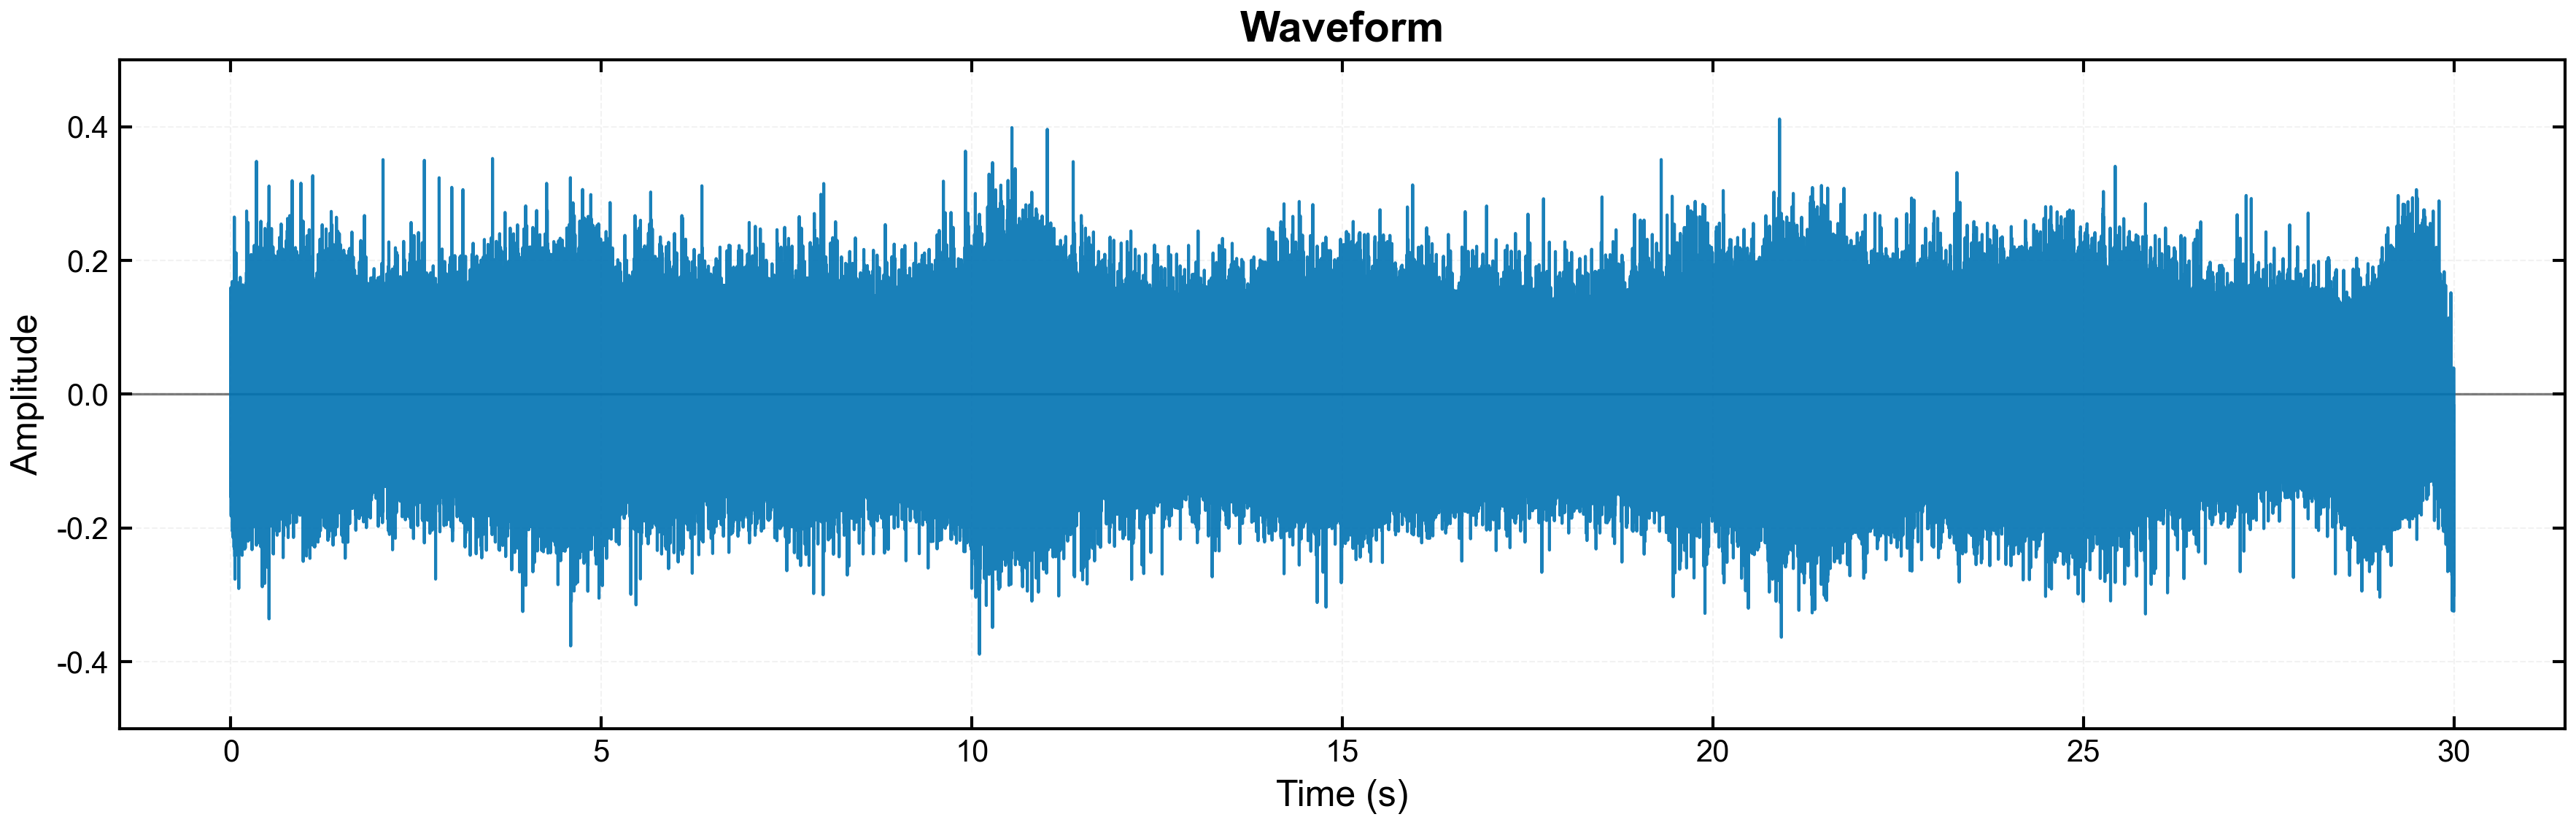

In [4]:
Visualizer.WaveformPlot(
    amplitude_data=diff_data[:, channel_id],
    time_range=(0, 30),
    amplitude_range=(-0.5, 0.5),
    file_name="Waveform",
    title="Waveform",
)


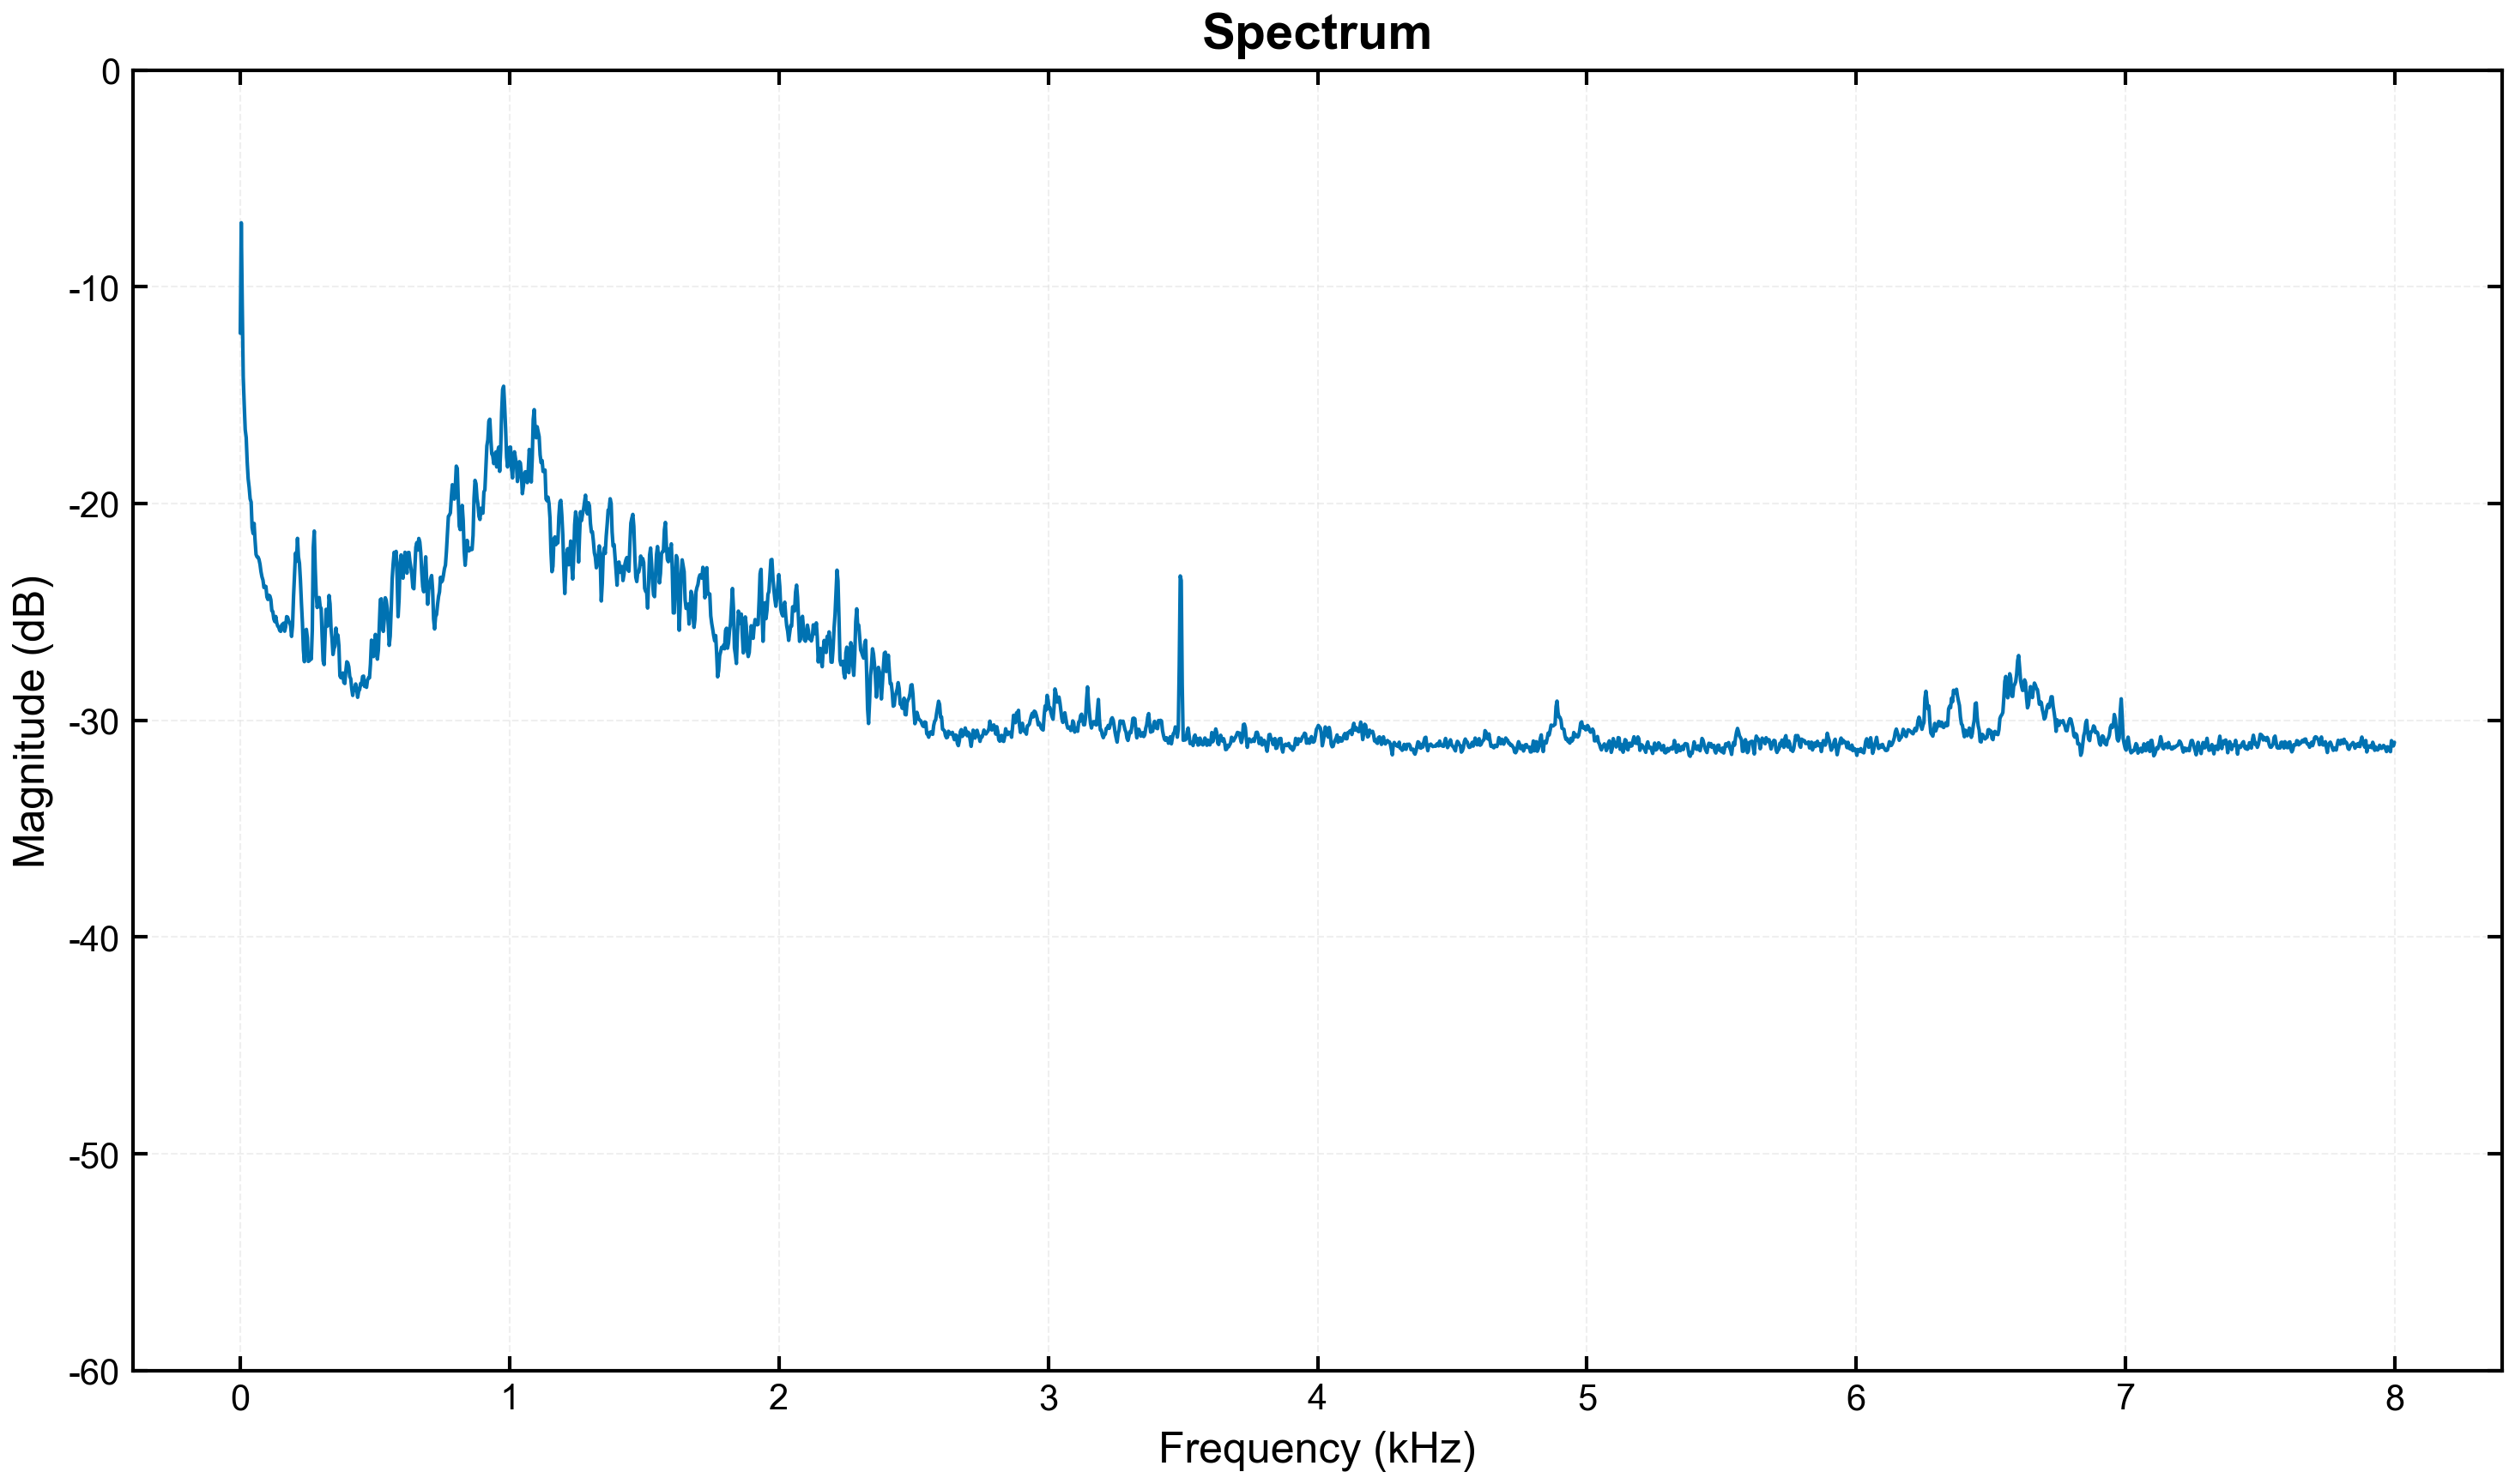

In [5]:
Visualizer.SpectrumPlot(
    data=int_data[:, channel_id],
    file_name="Spectrum",
    title="Spectrum",
    freq_range=(0, 8000),
    db_range=(-60, 0),
)


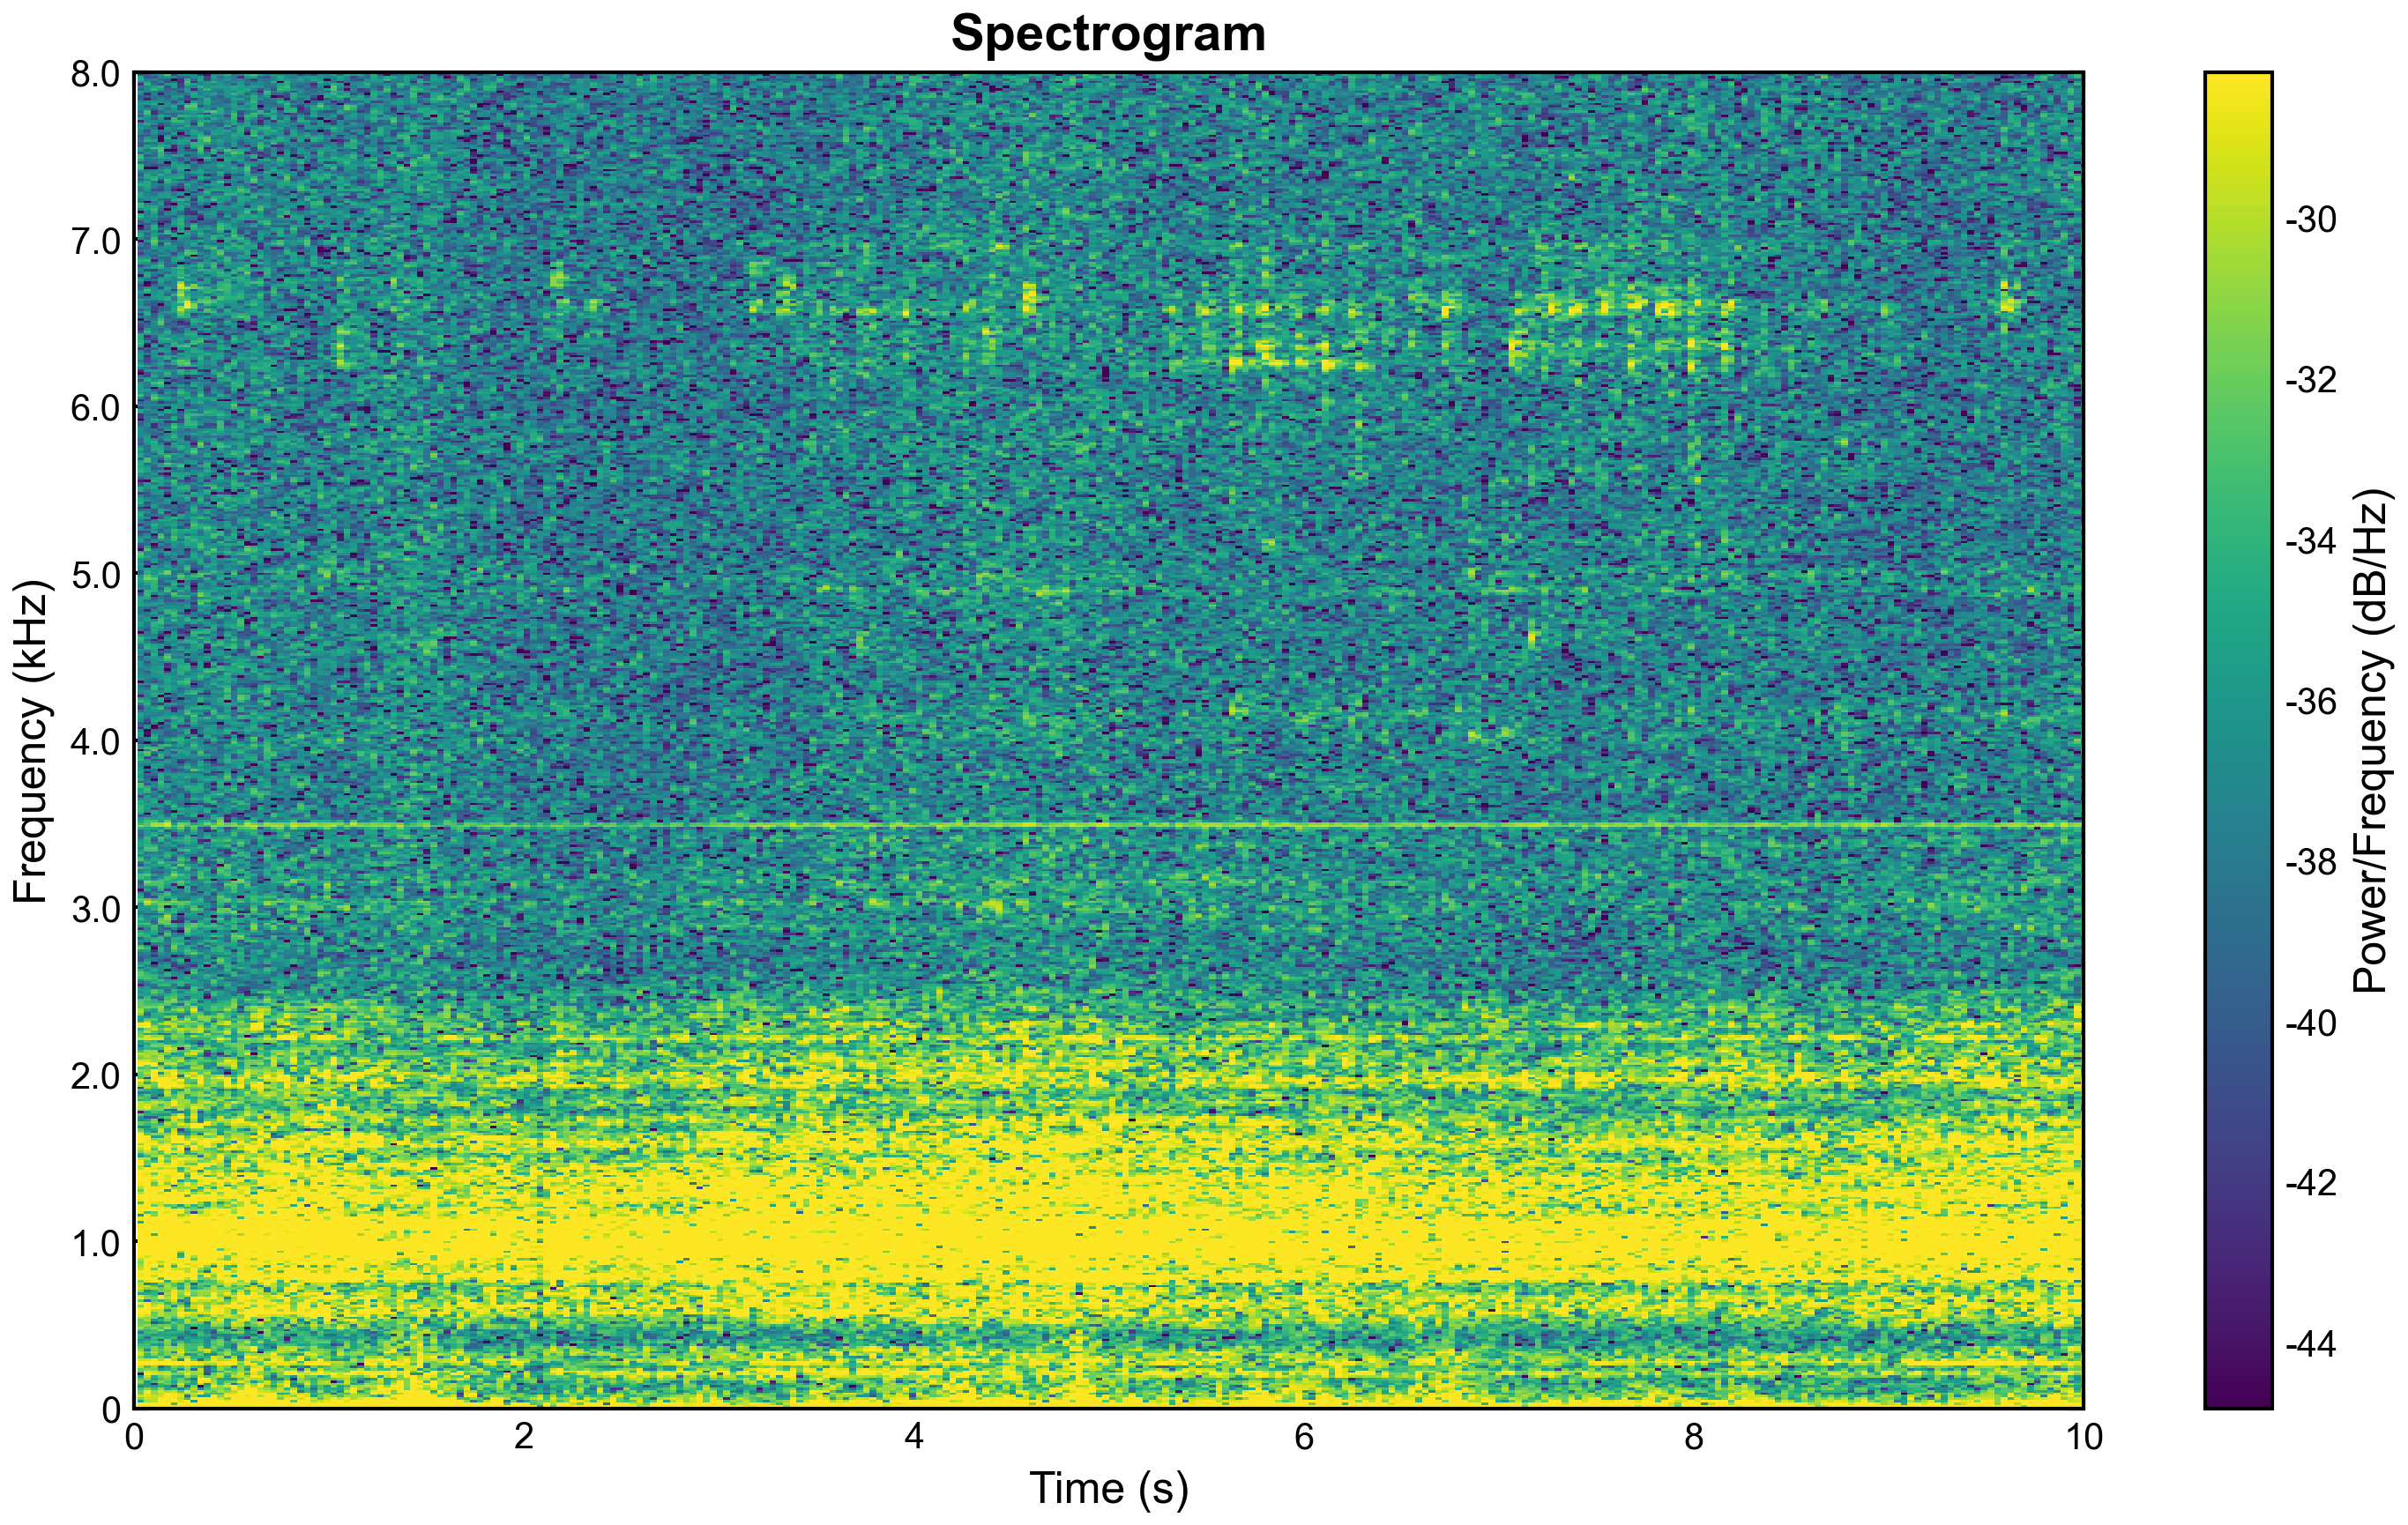

In [6]:
# 对于时频图，直接传入单通道数据而不是整个数据矩阵
Visualizer.SpectrogramPlot(
    data=int_data[:, channel_id],
    time_range=(0, 10),
    freq_range=(0, 8000),
    file_name="Spectrogram",
    title="Spectrogram",
)


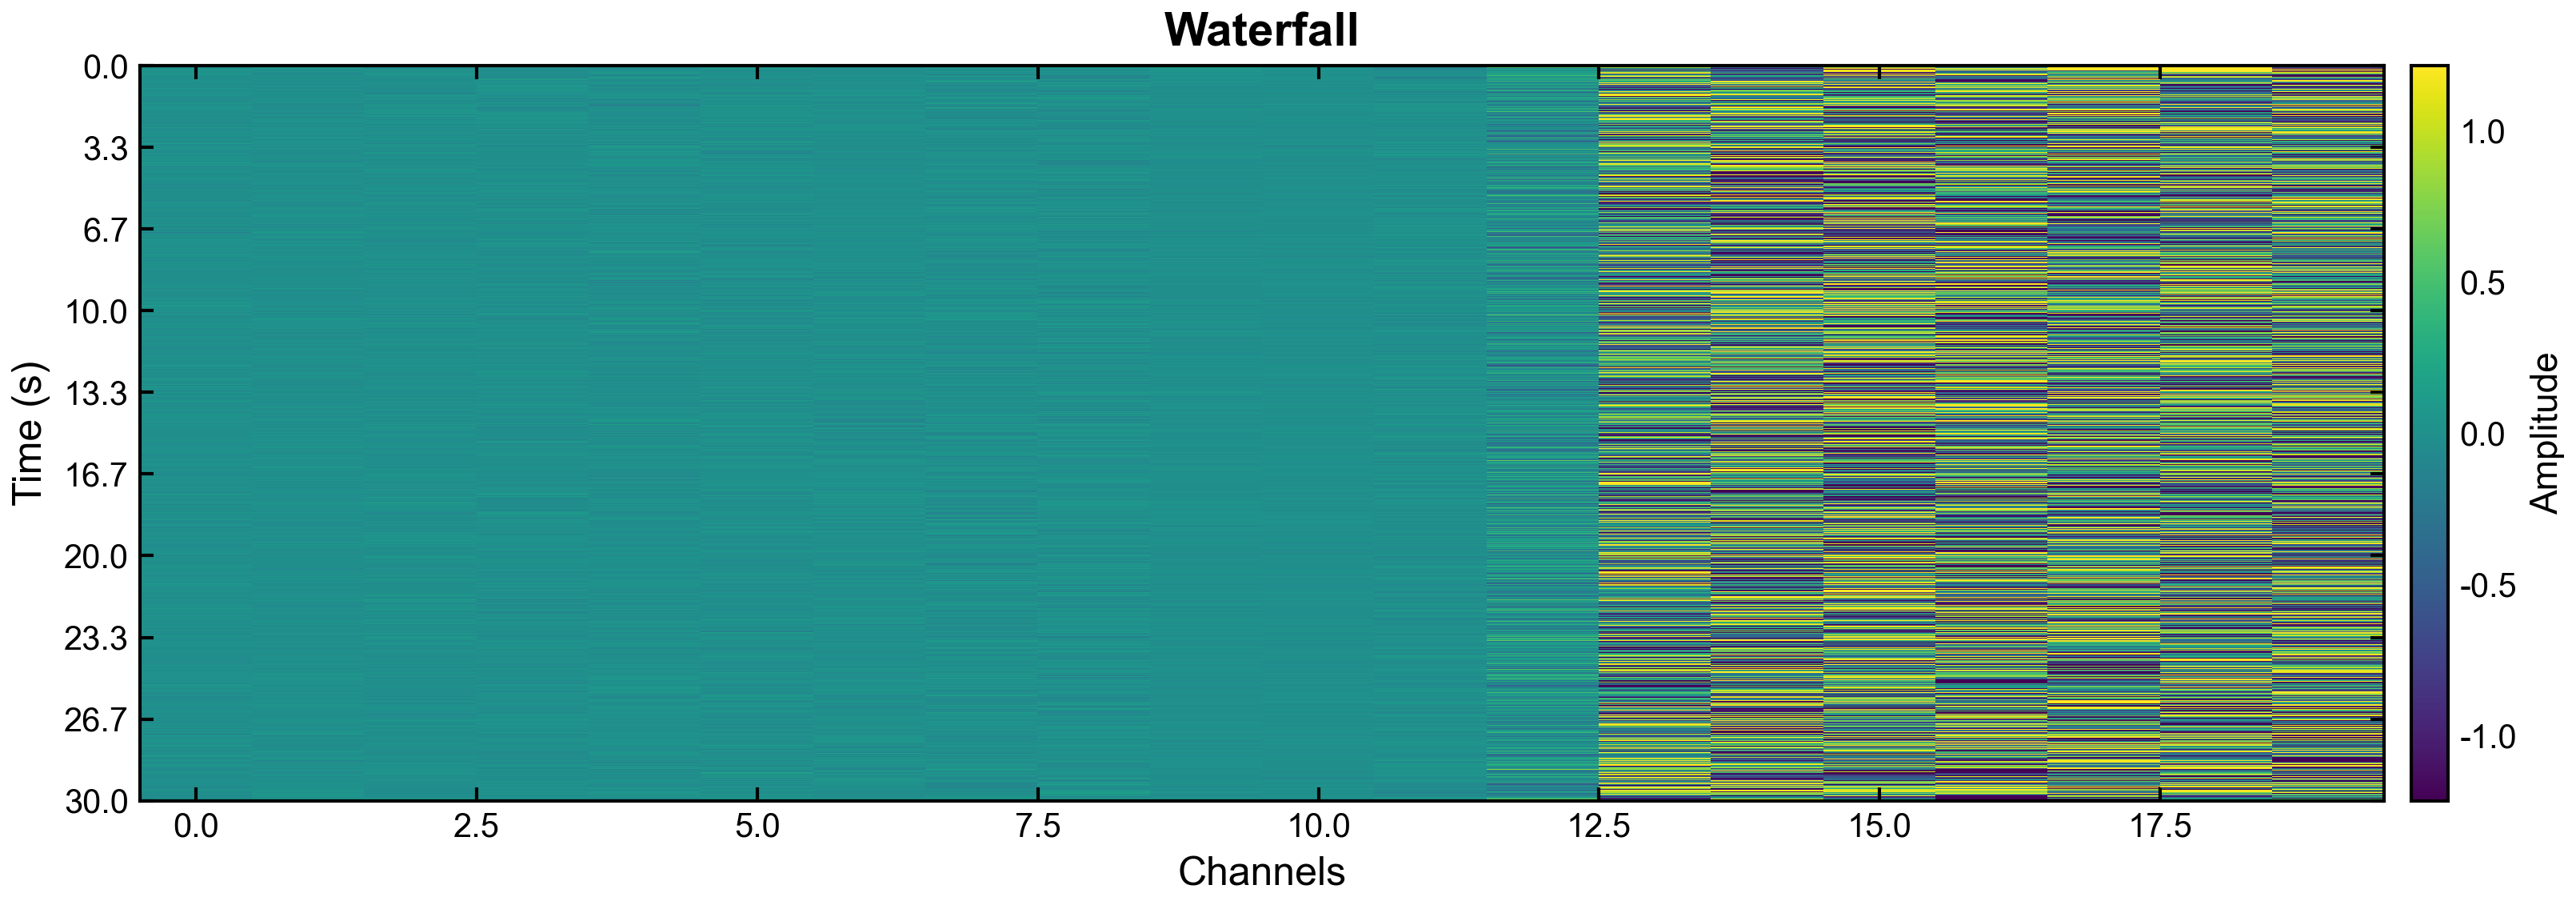

In [7]:
# 对于时频图，直接传入单通道数据而不是整个数据矩阵
Visualizer.WaterfallPlot(
    data=diff_data,
    title="Waterfall",
)

In [8]:
from scipy.linalg import hankel

# 示例
hankel_matrix = hankel([1, 17, 99])
print("Hankel Matrix:")
print(hankel_matrix)


Hankel Matrix:
[[ 1 17 99]
 [17 99  0]
 [99  0  0]]


## 相空间查看不同点位表示情况

数据形状: (900000, 20)
通道数量: 10


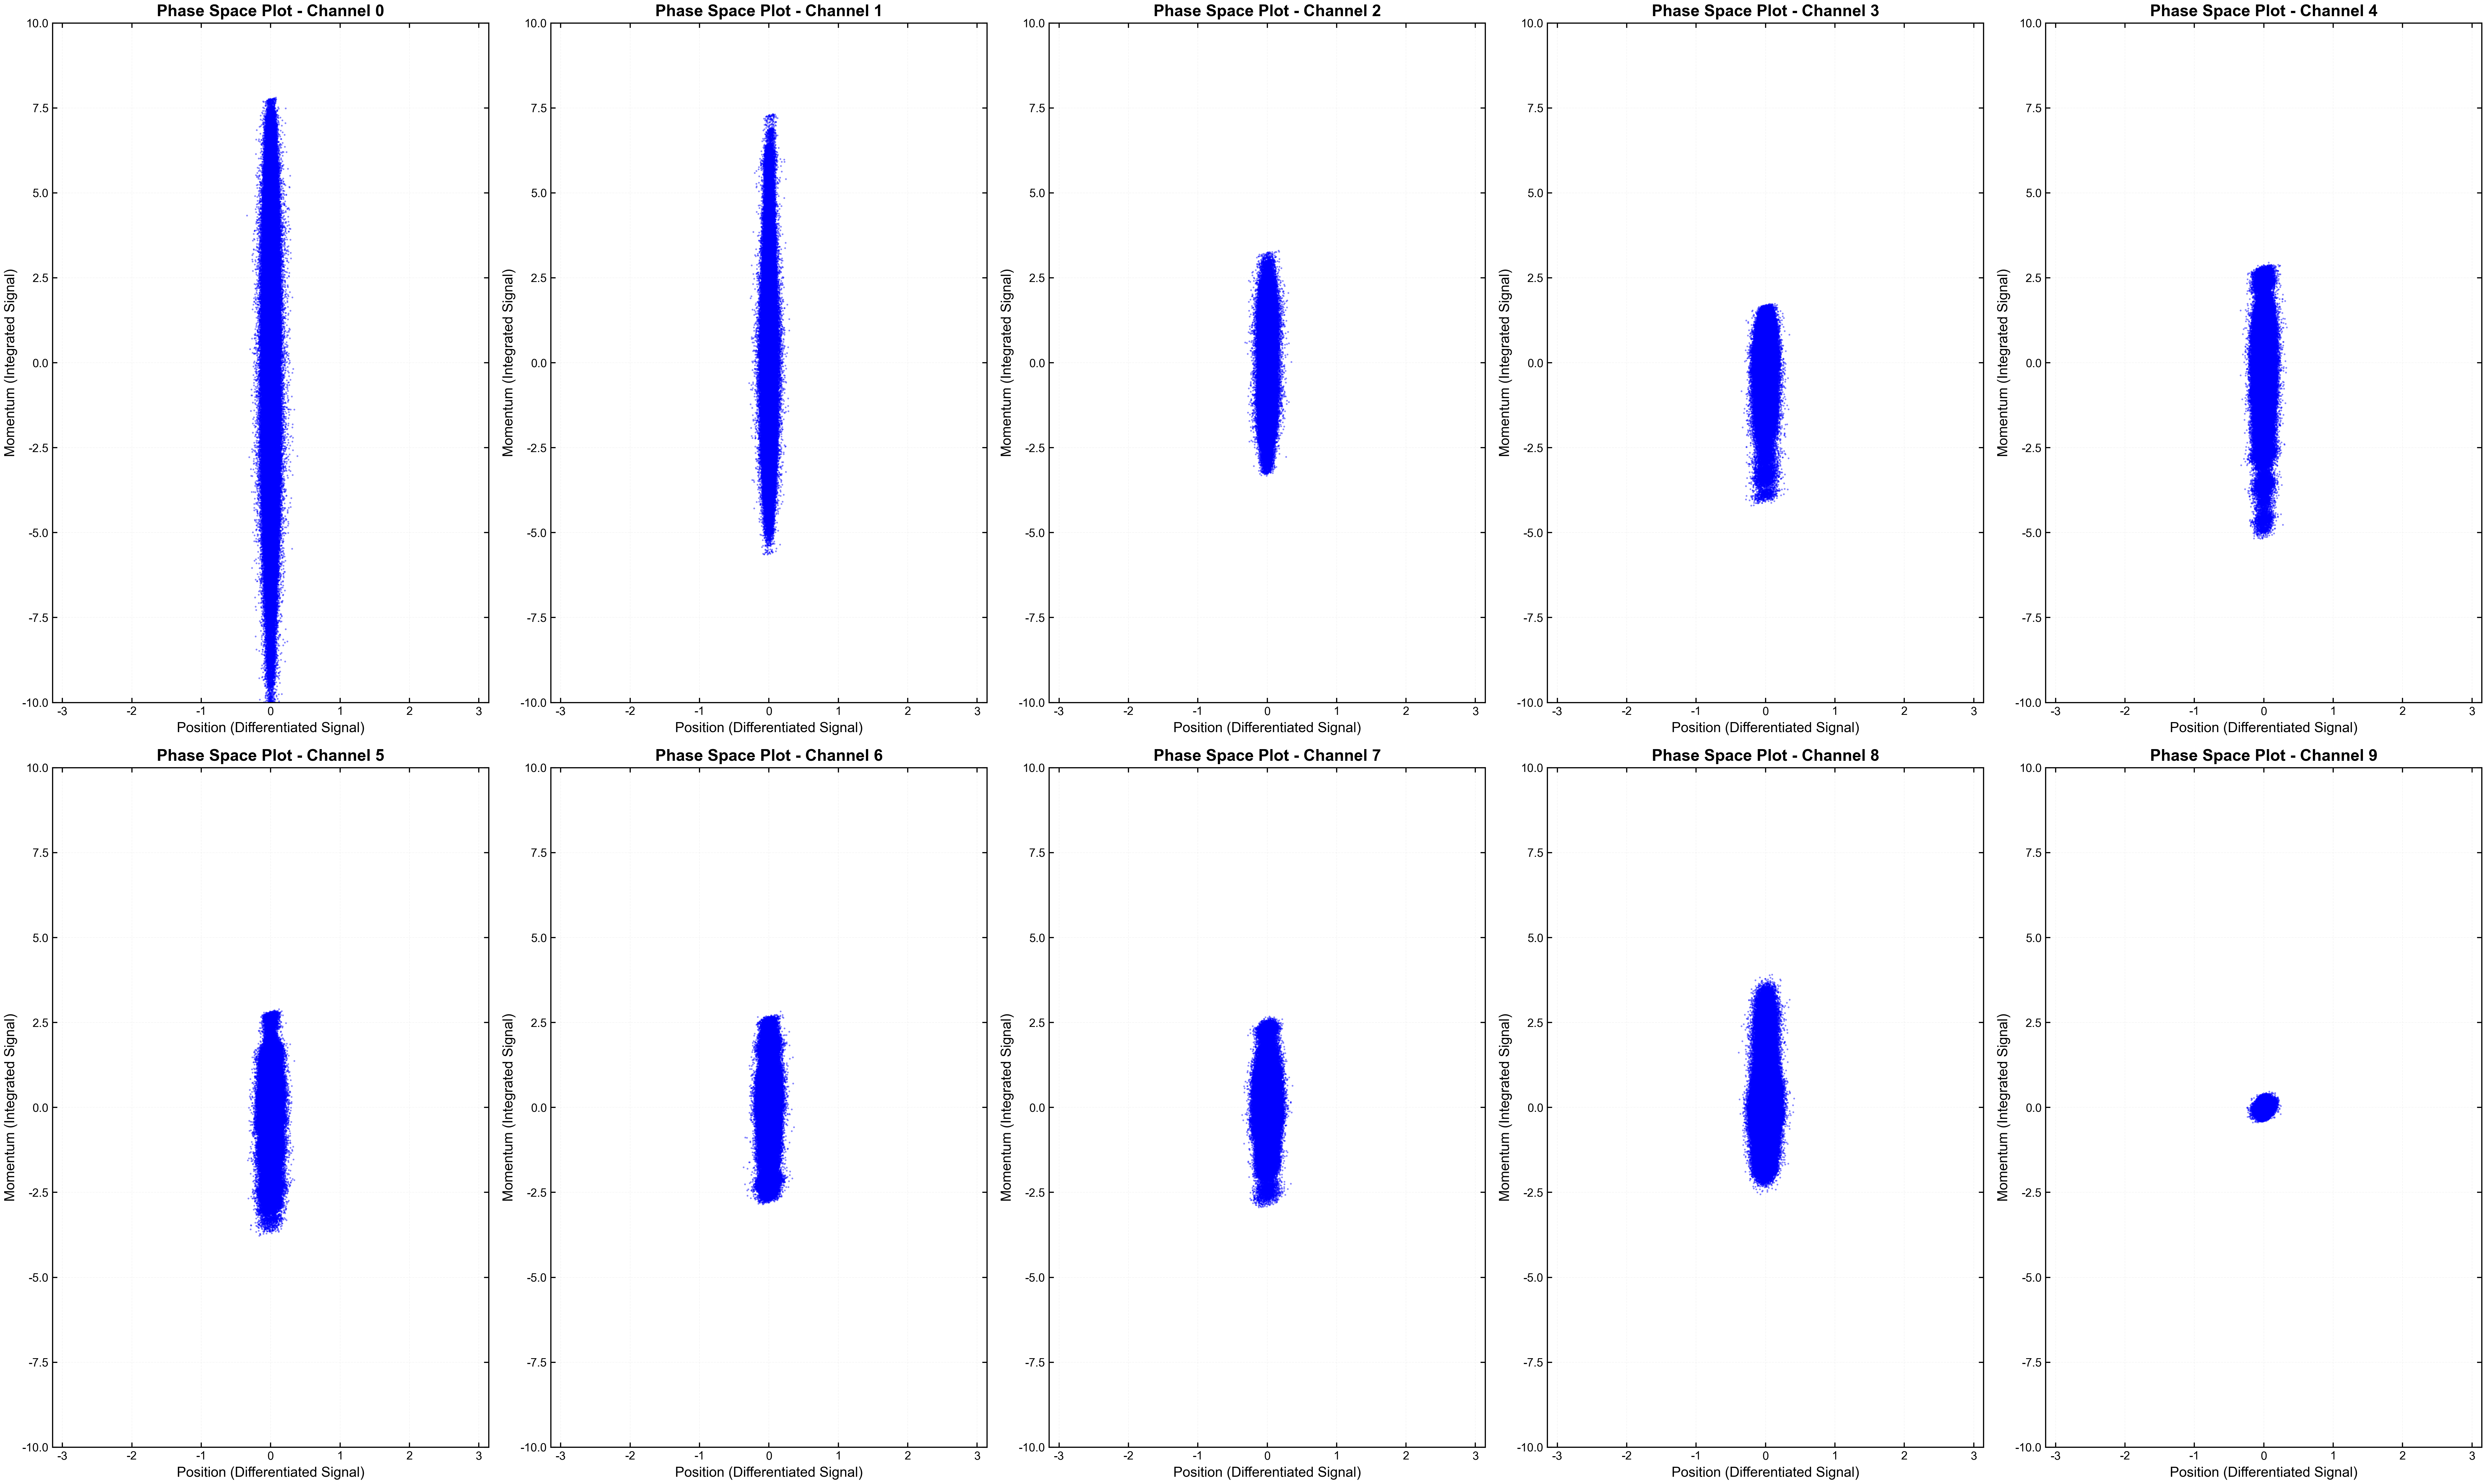

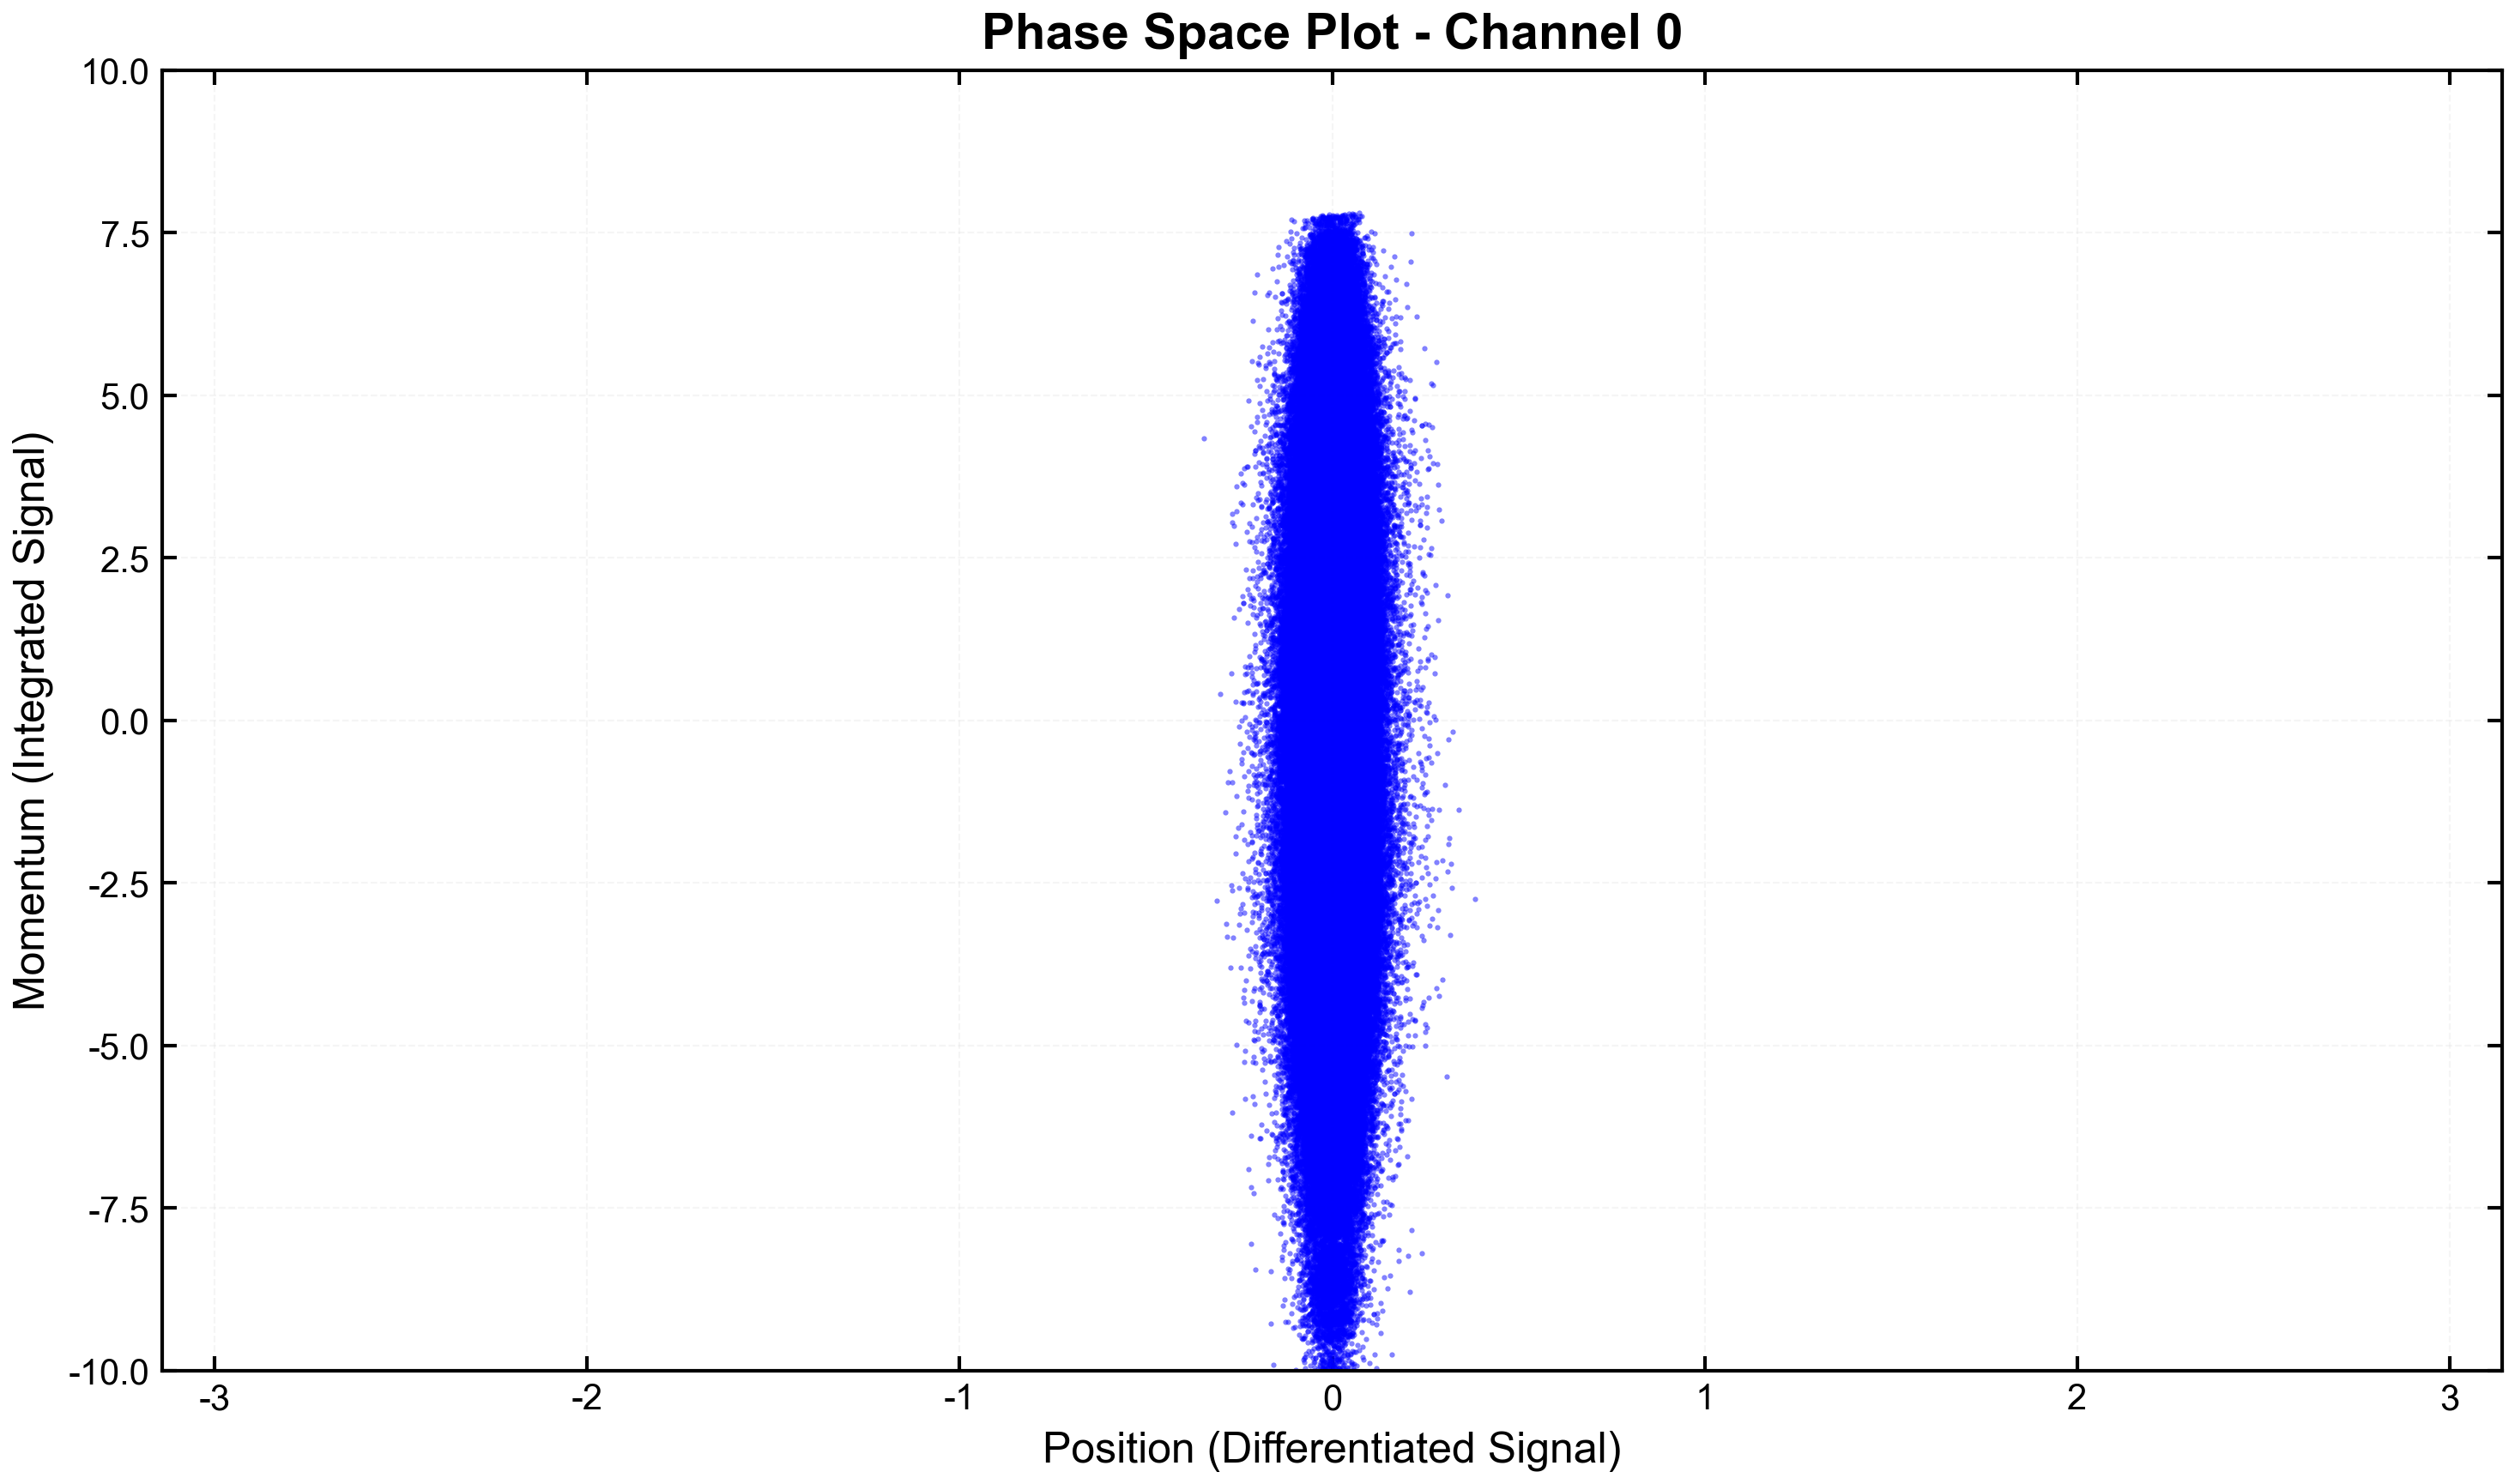

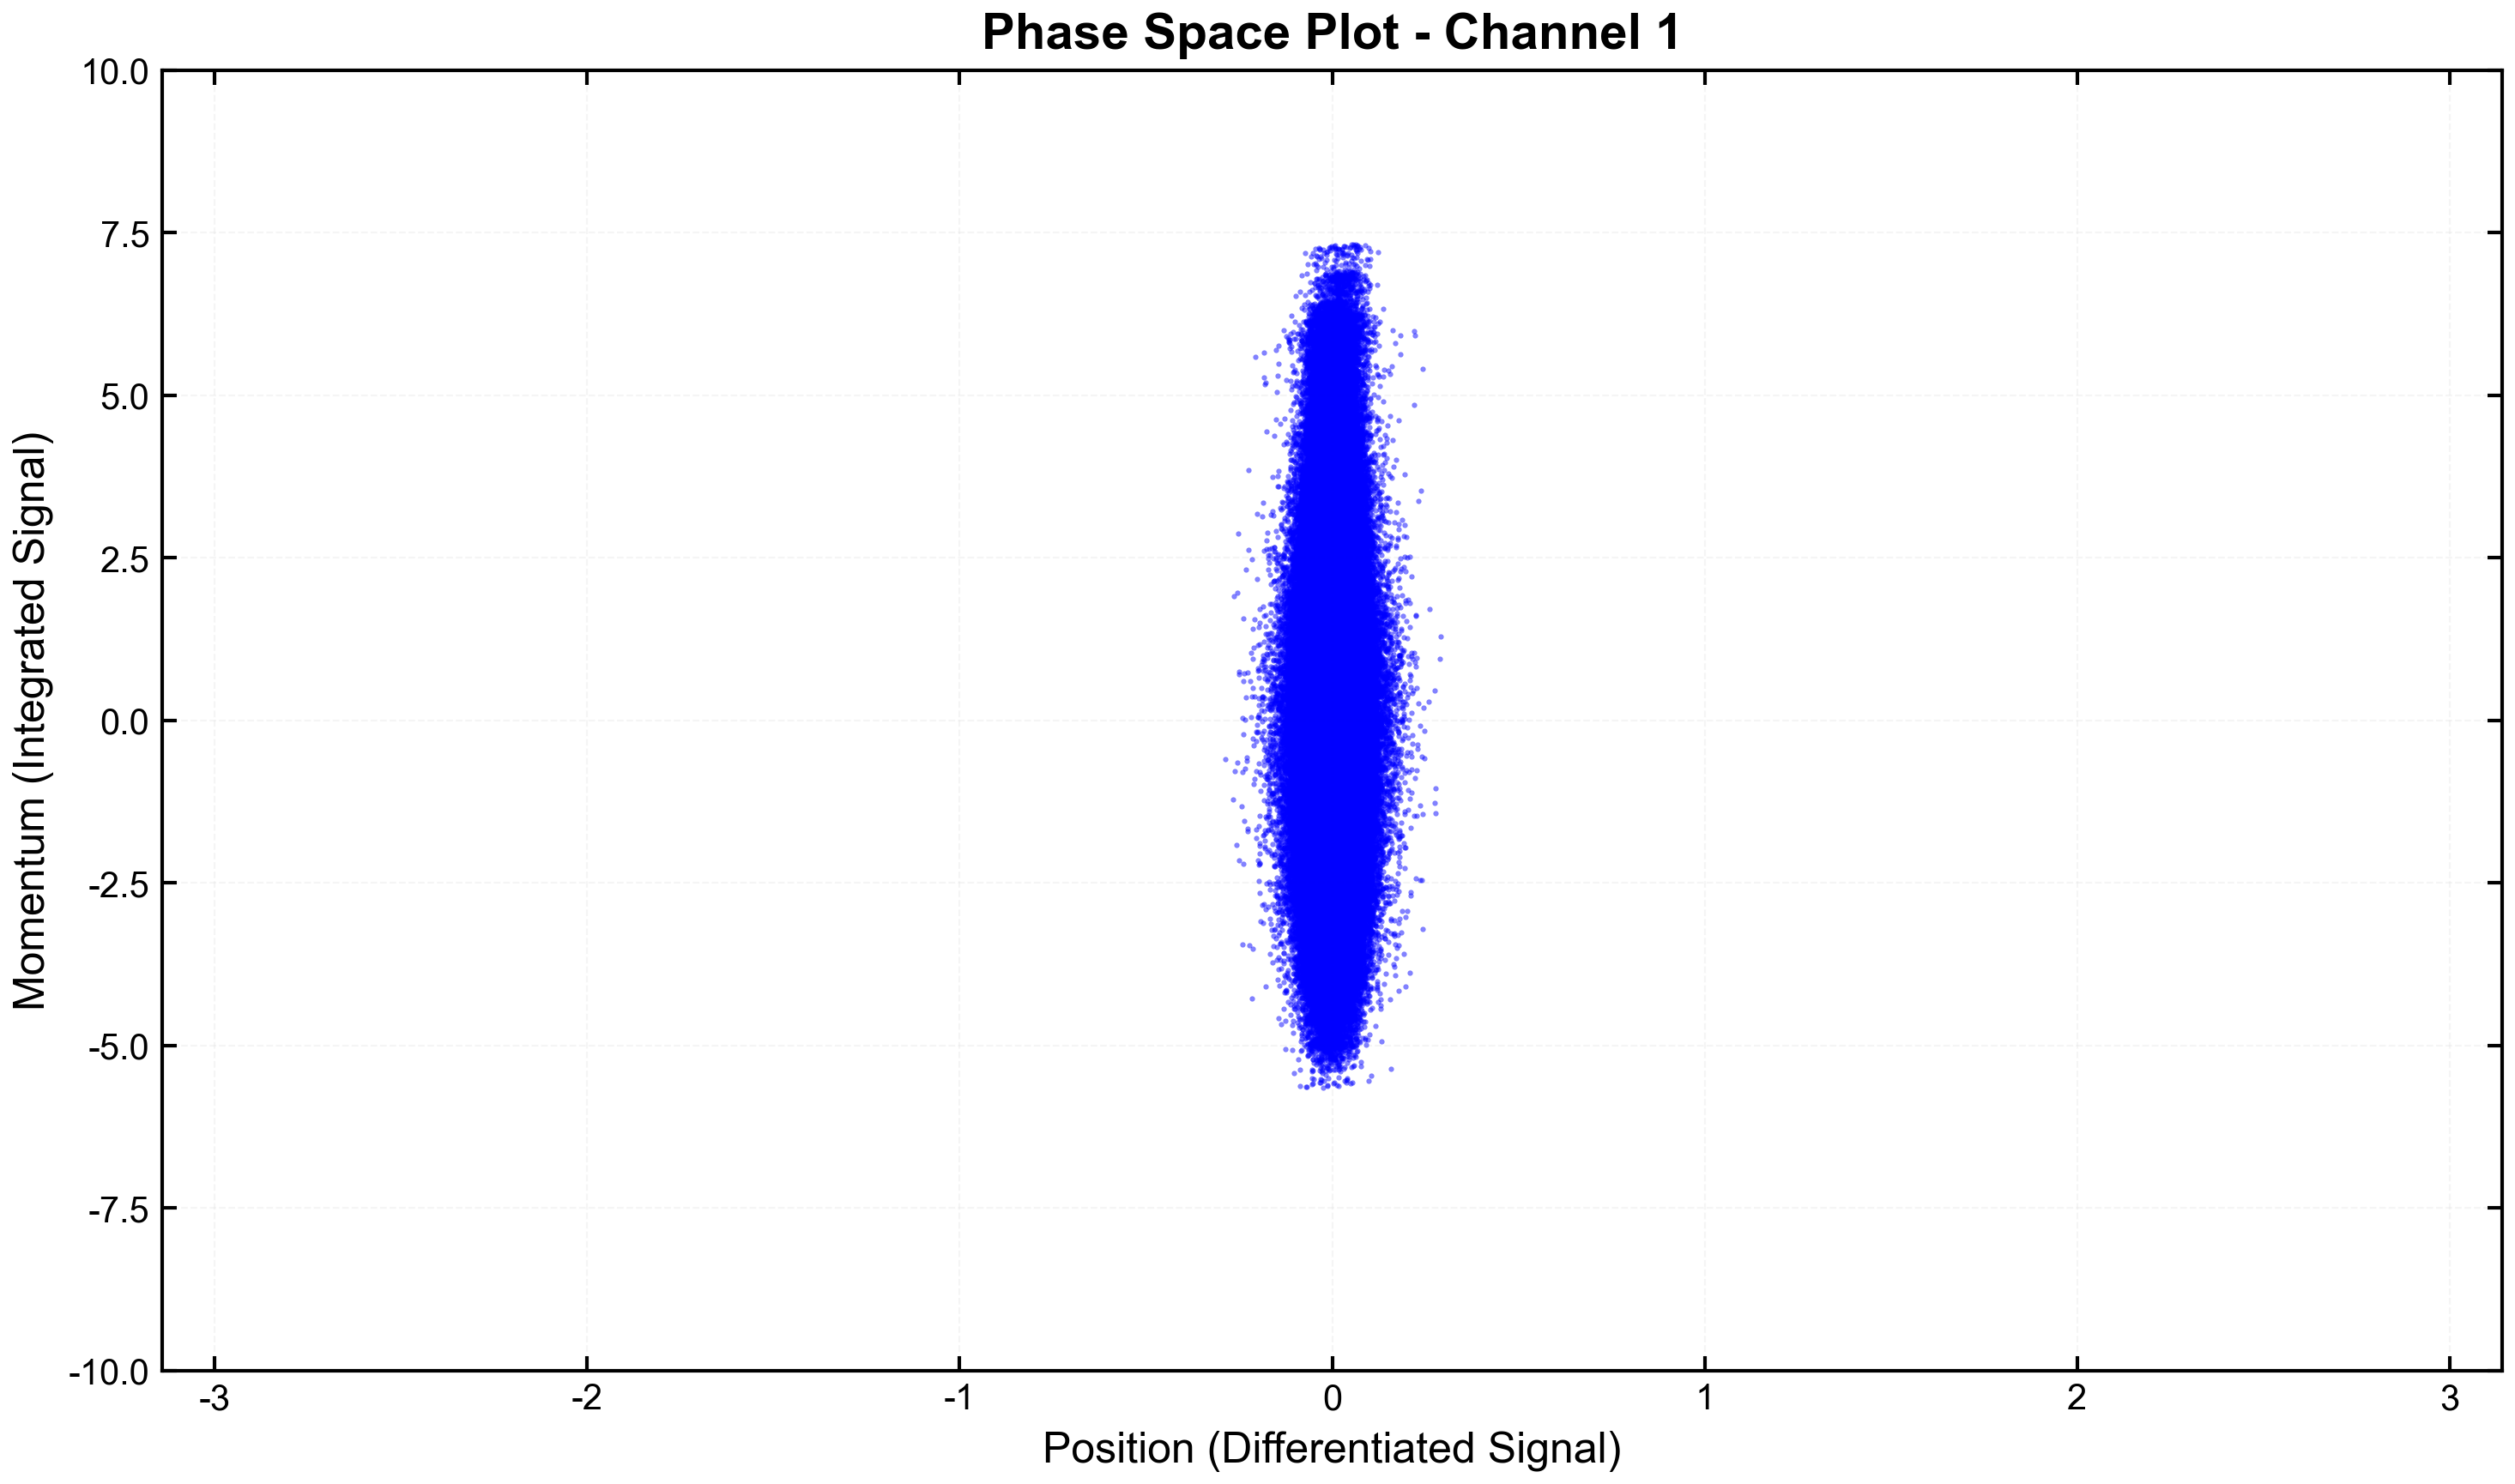

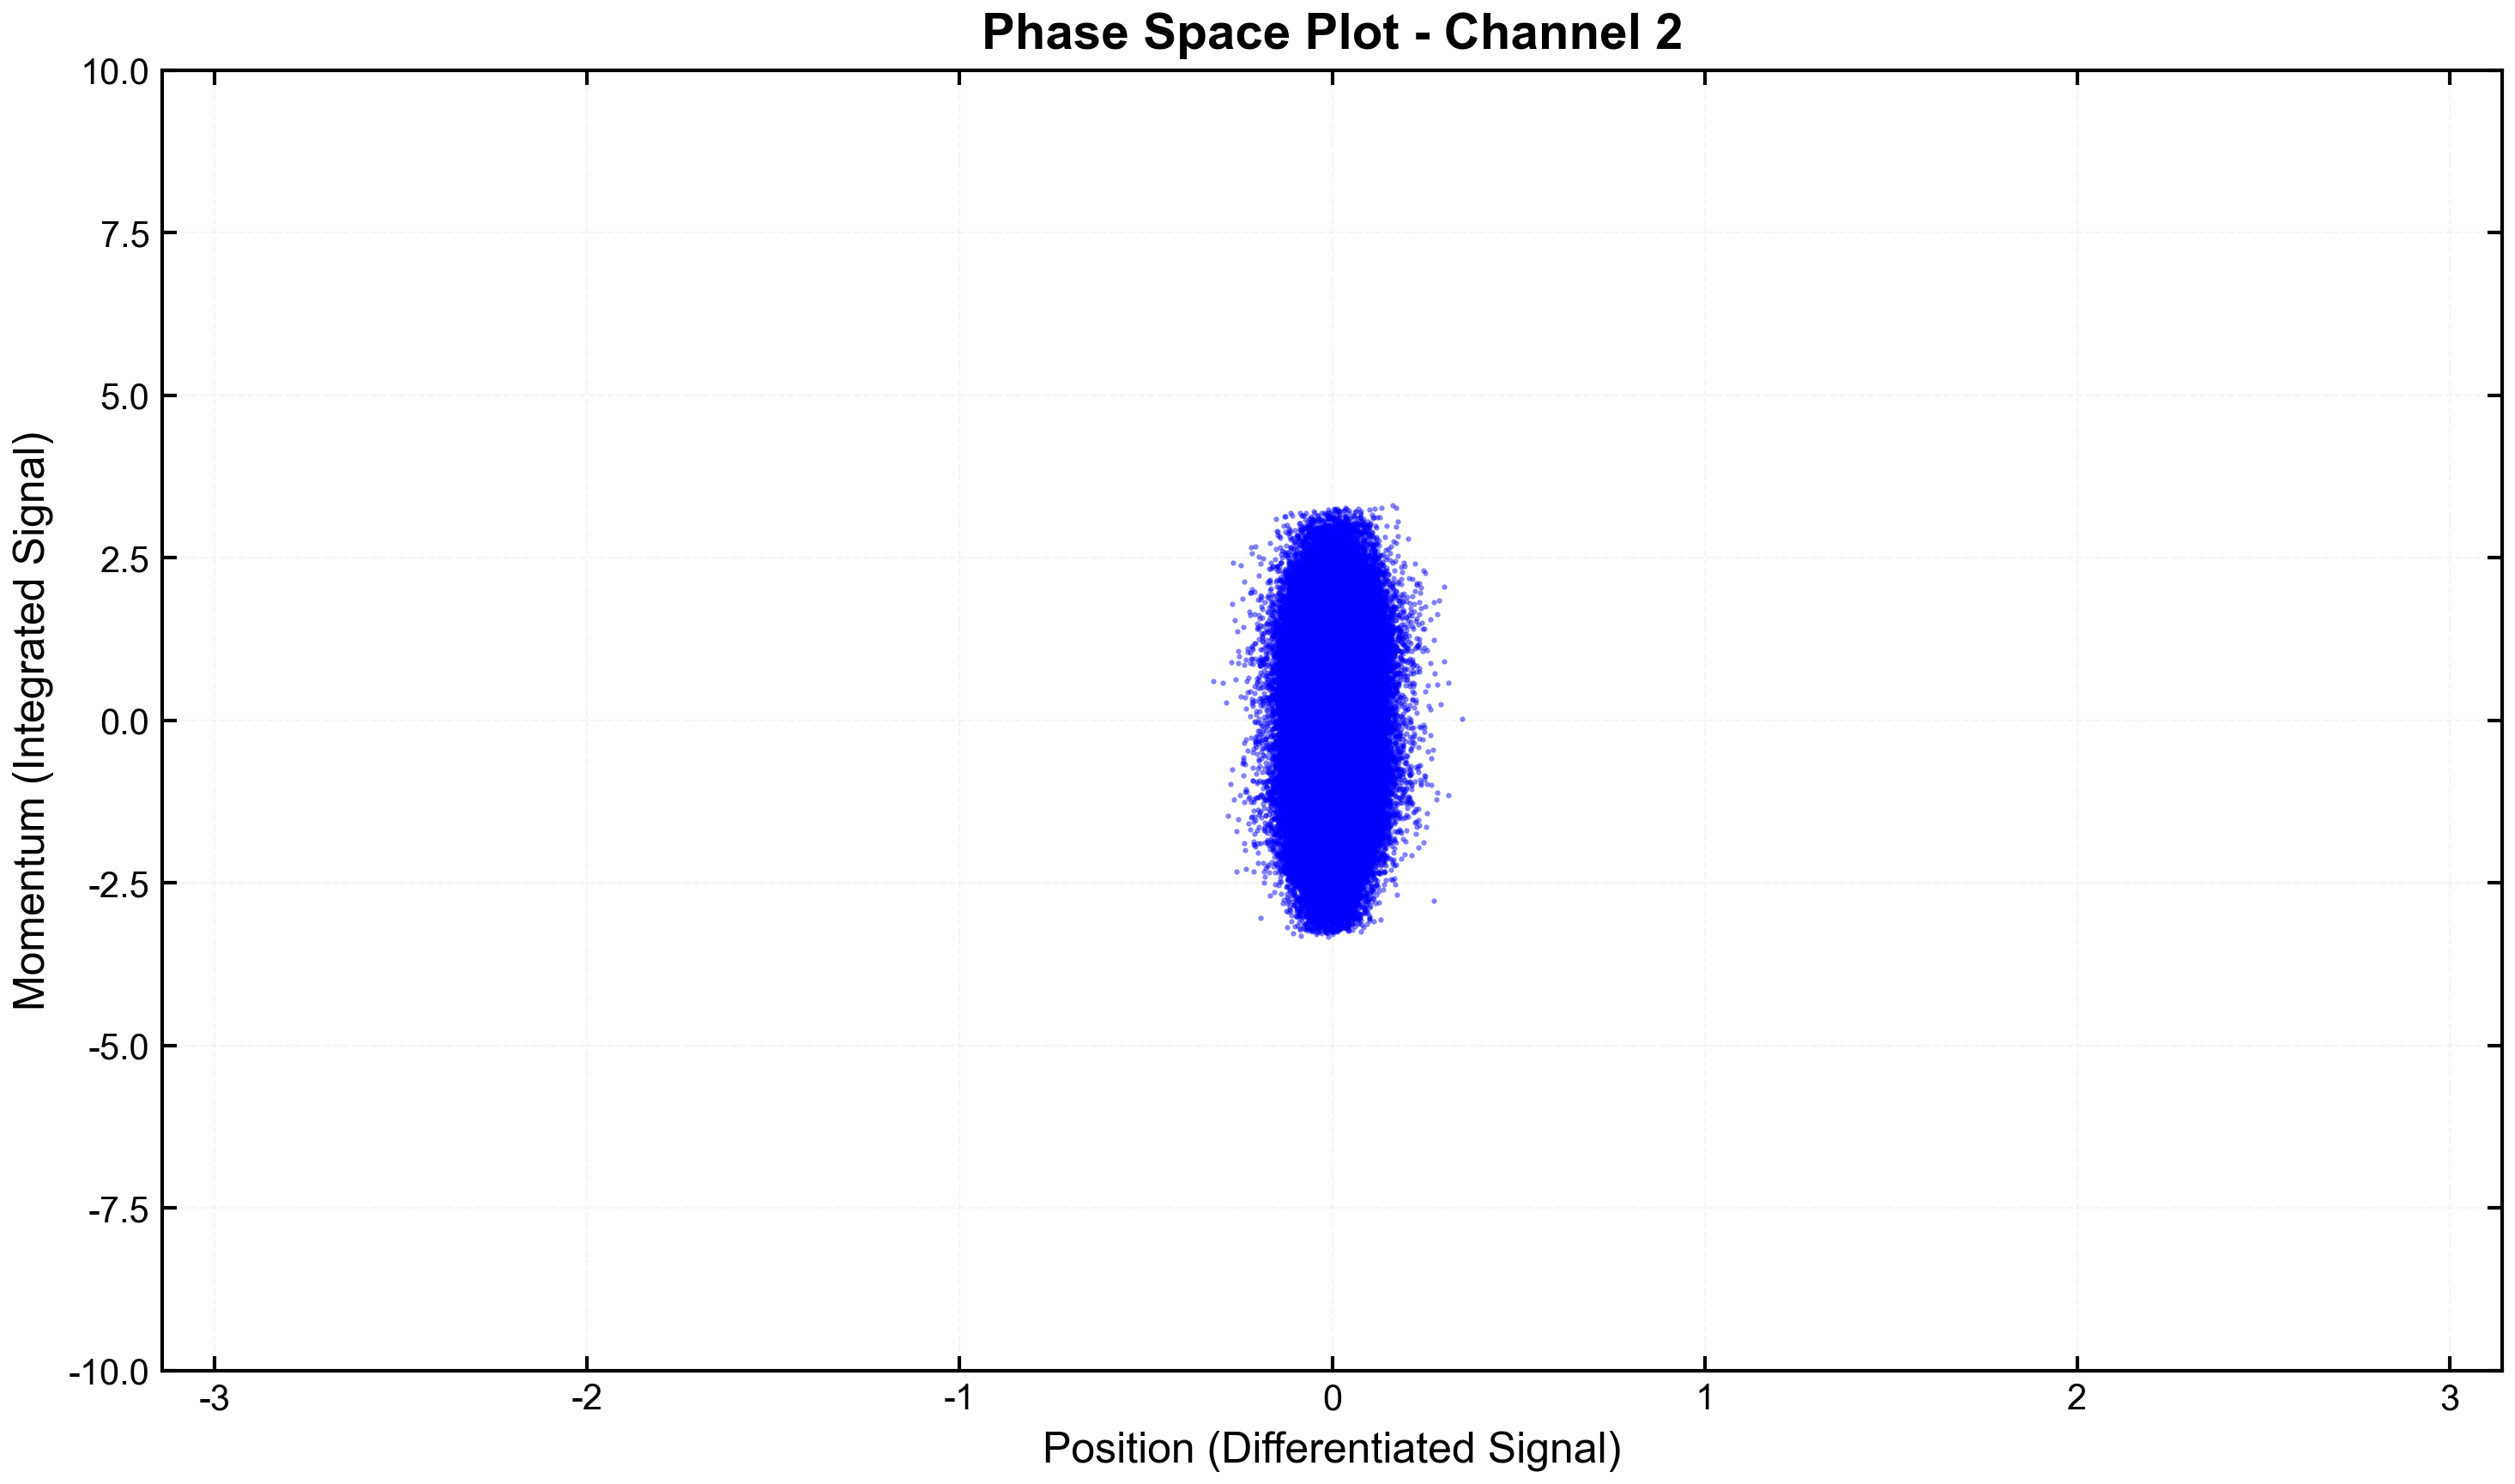

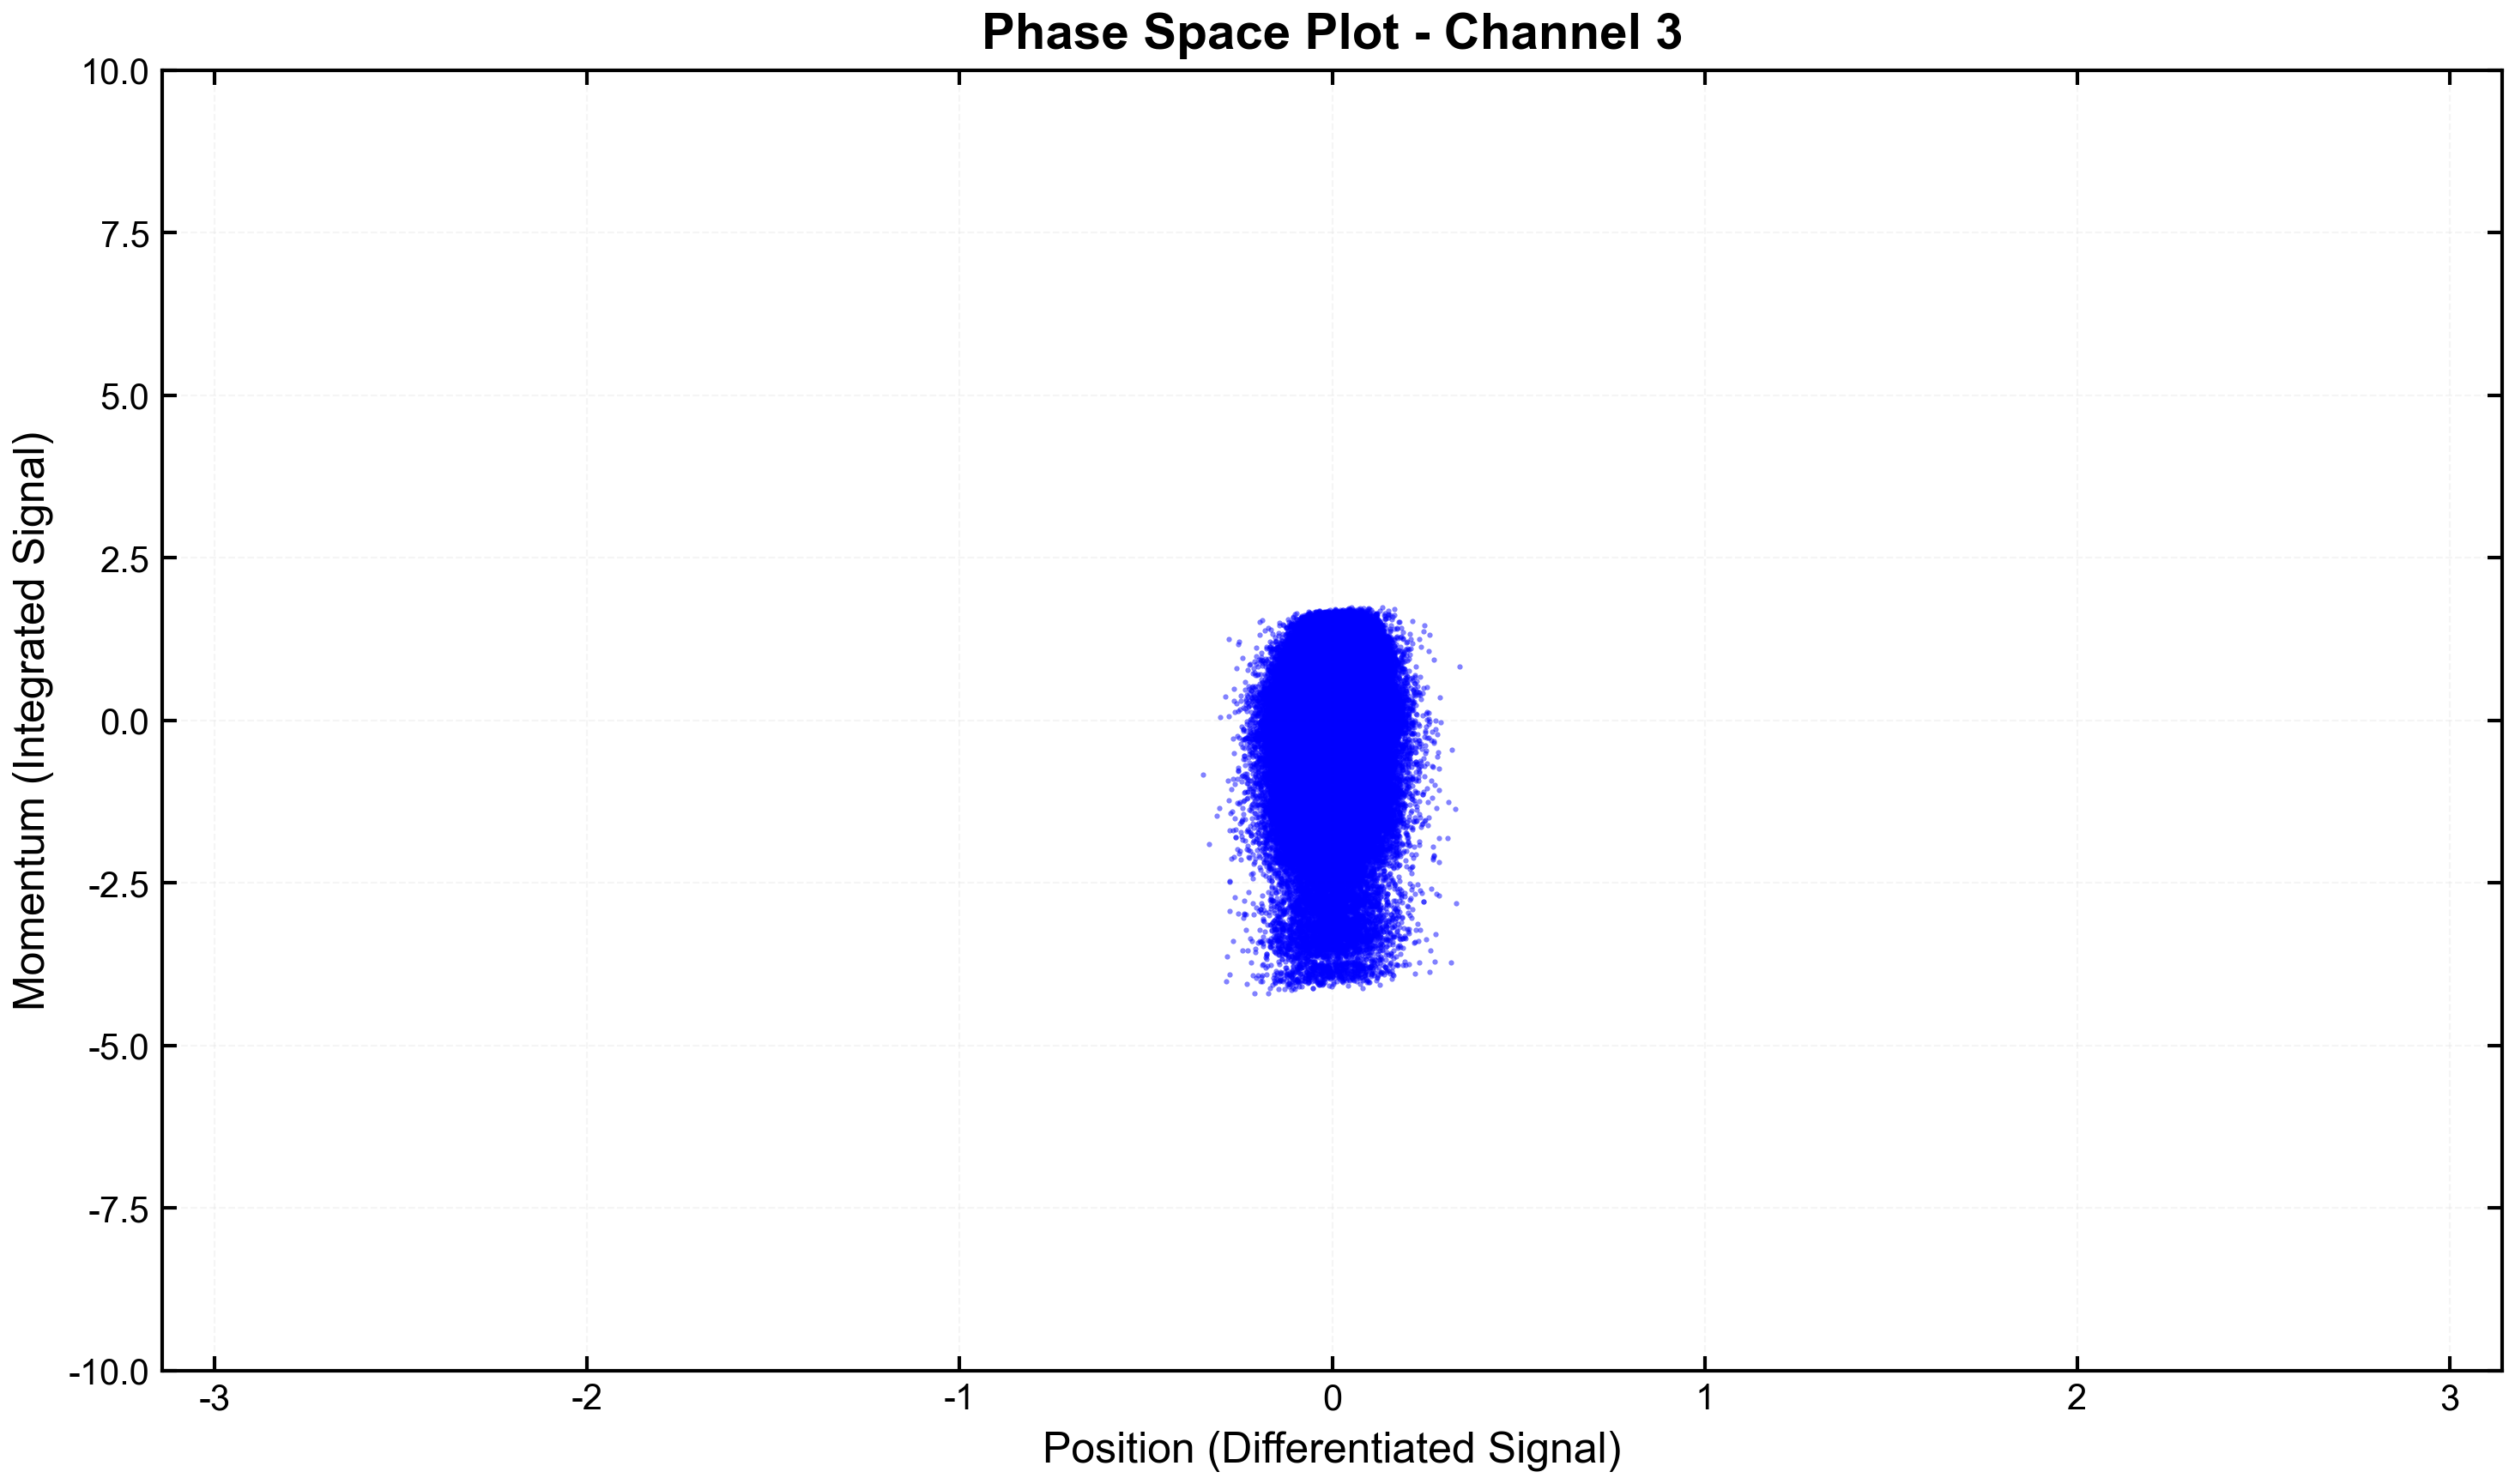

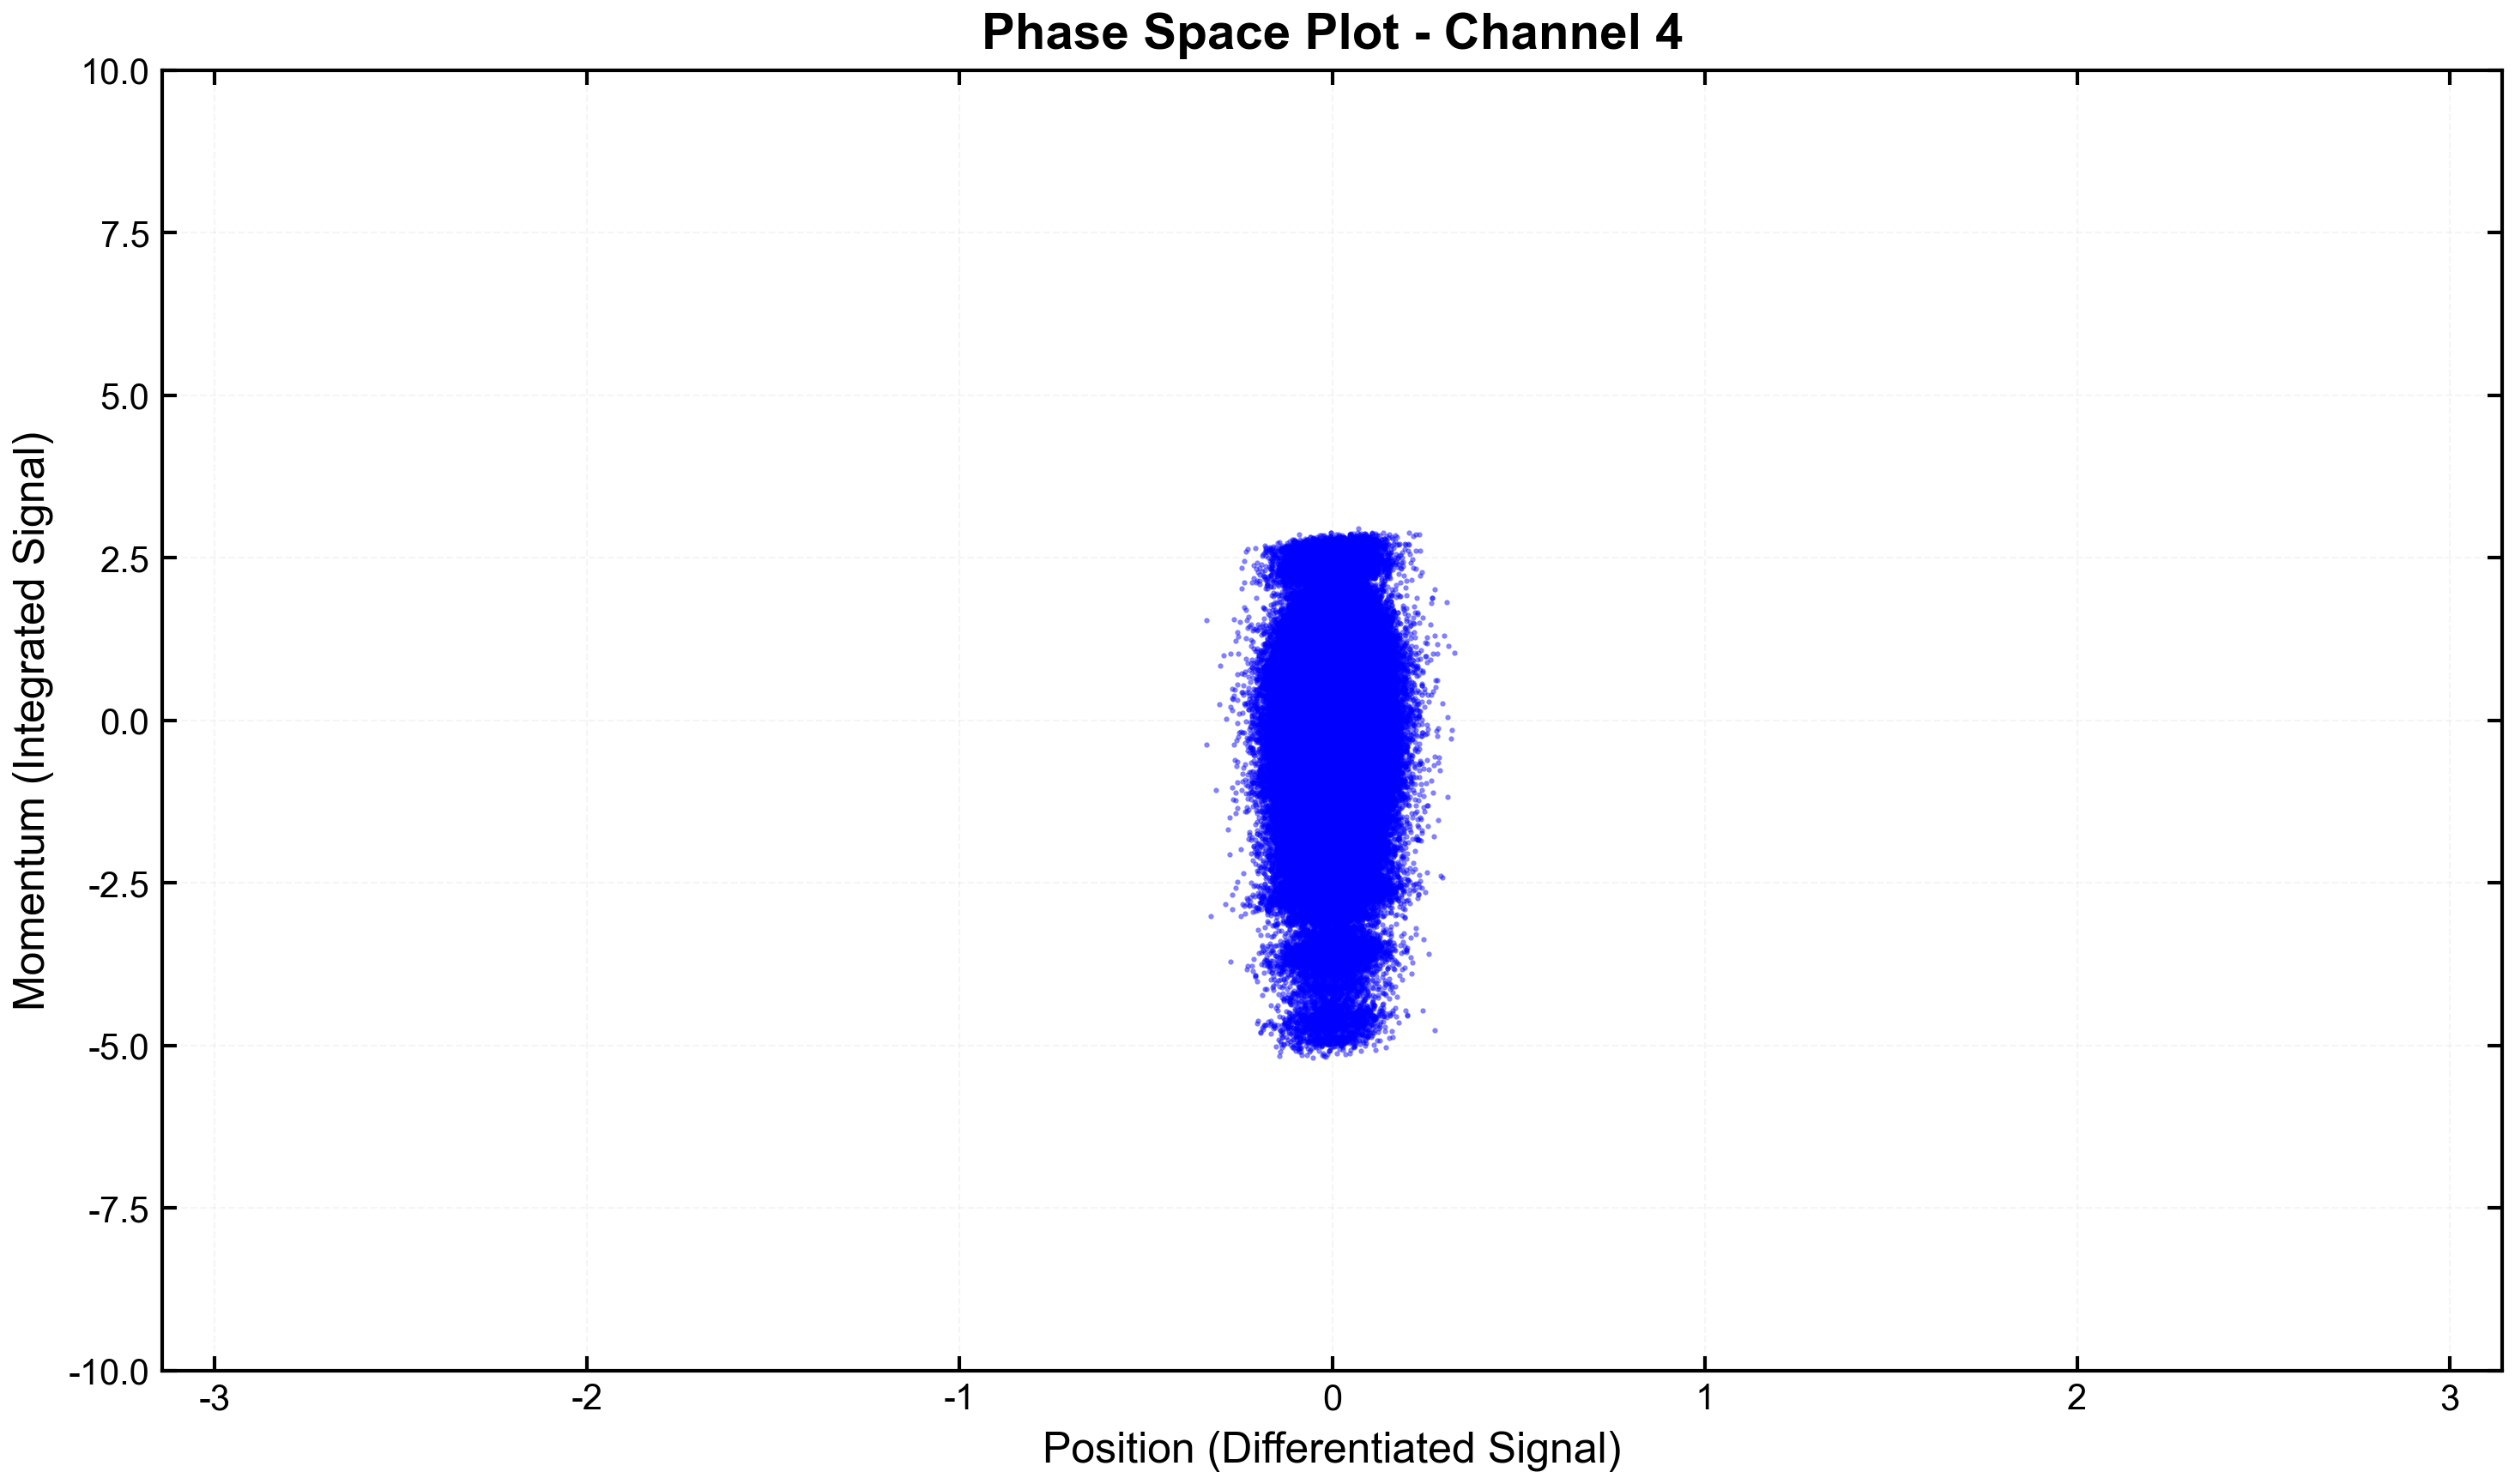

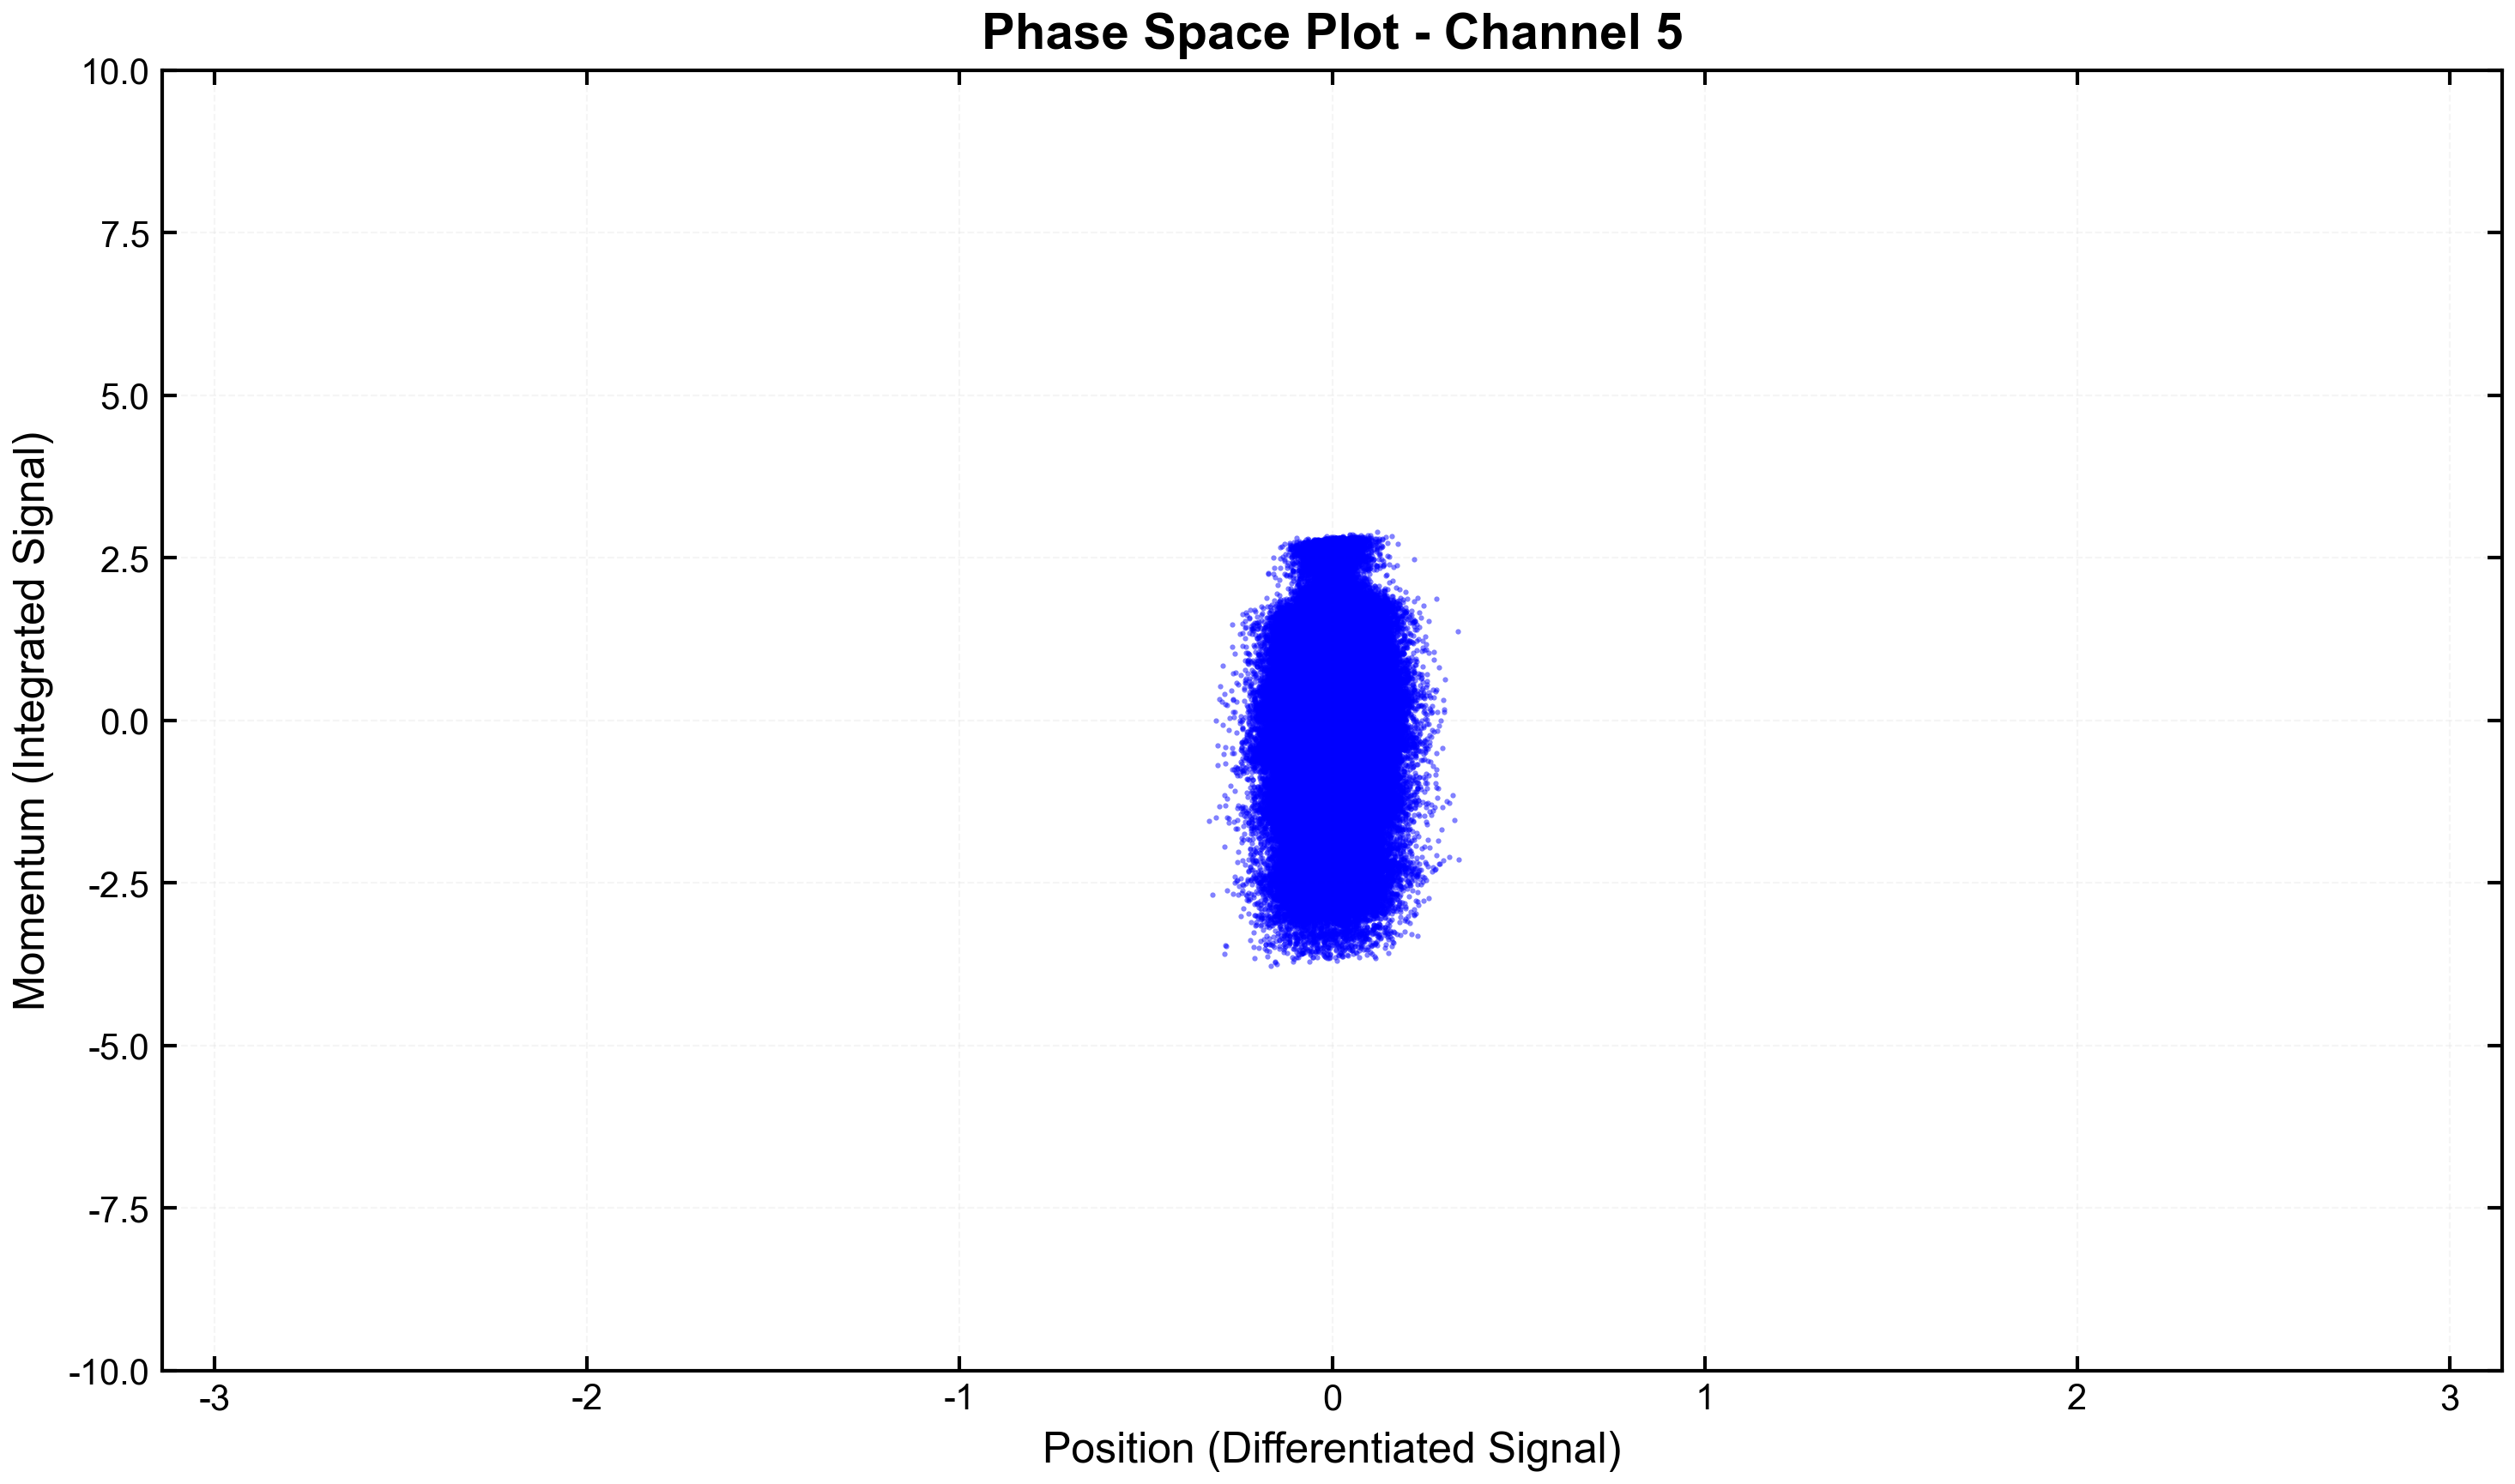

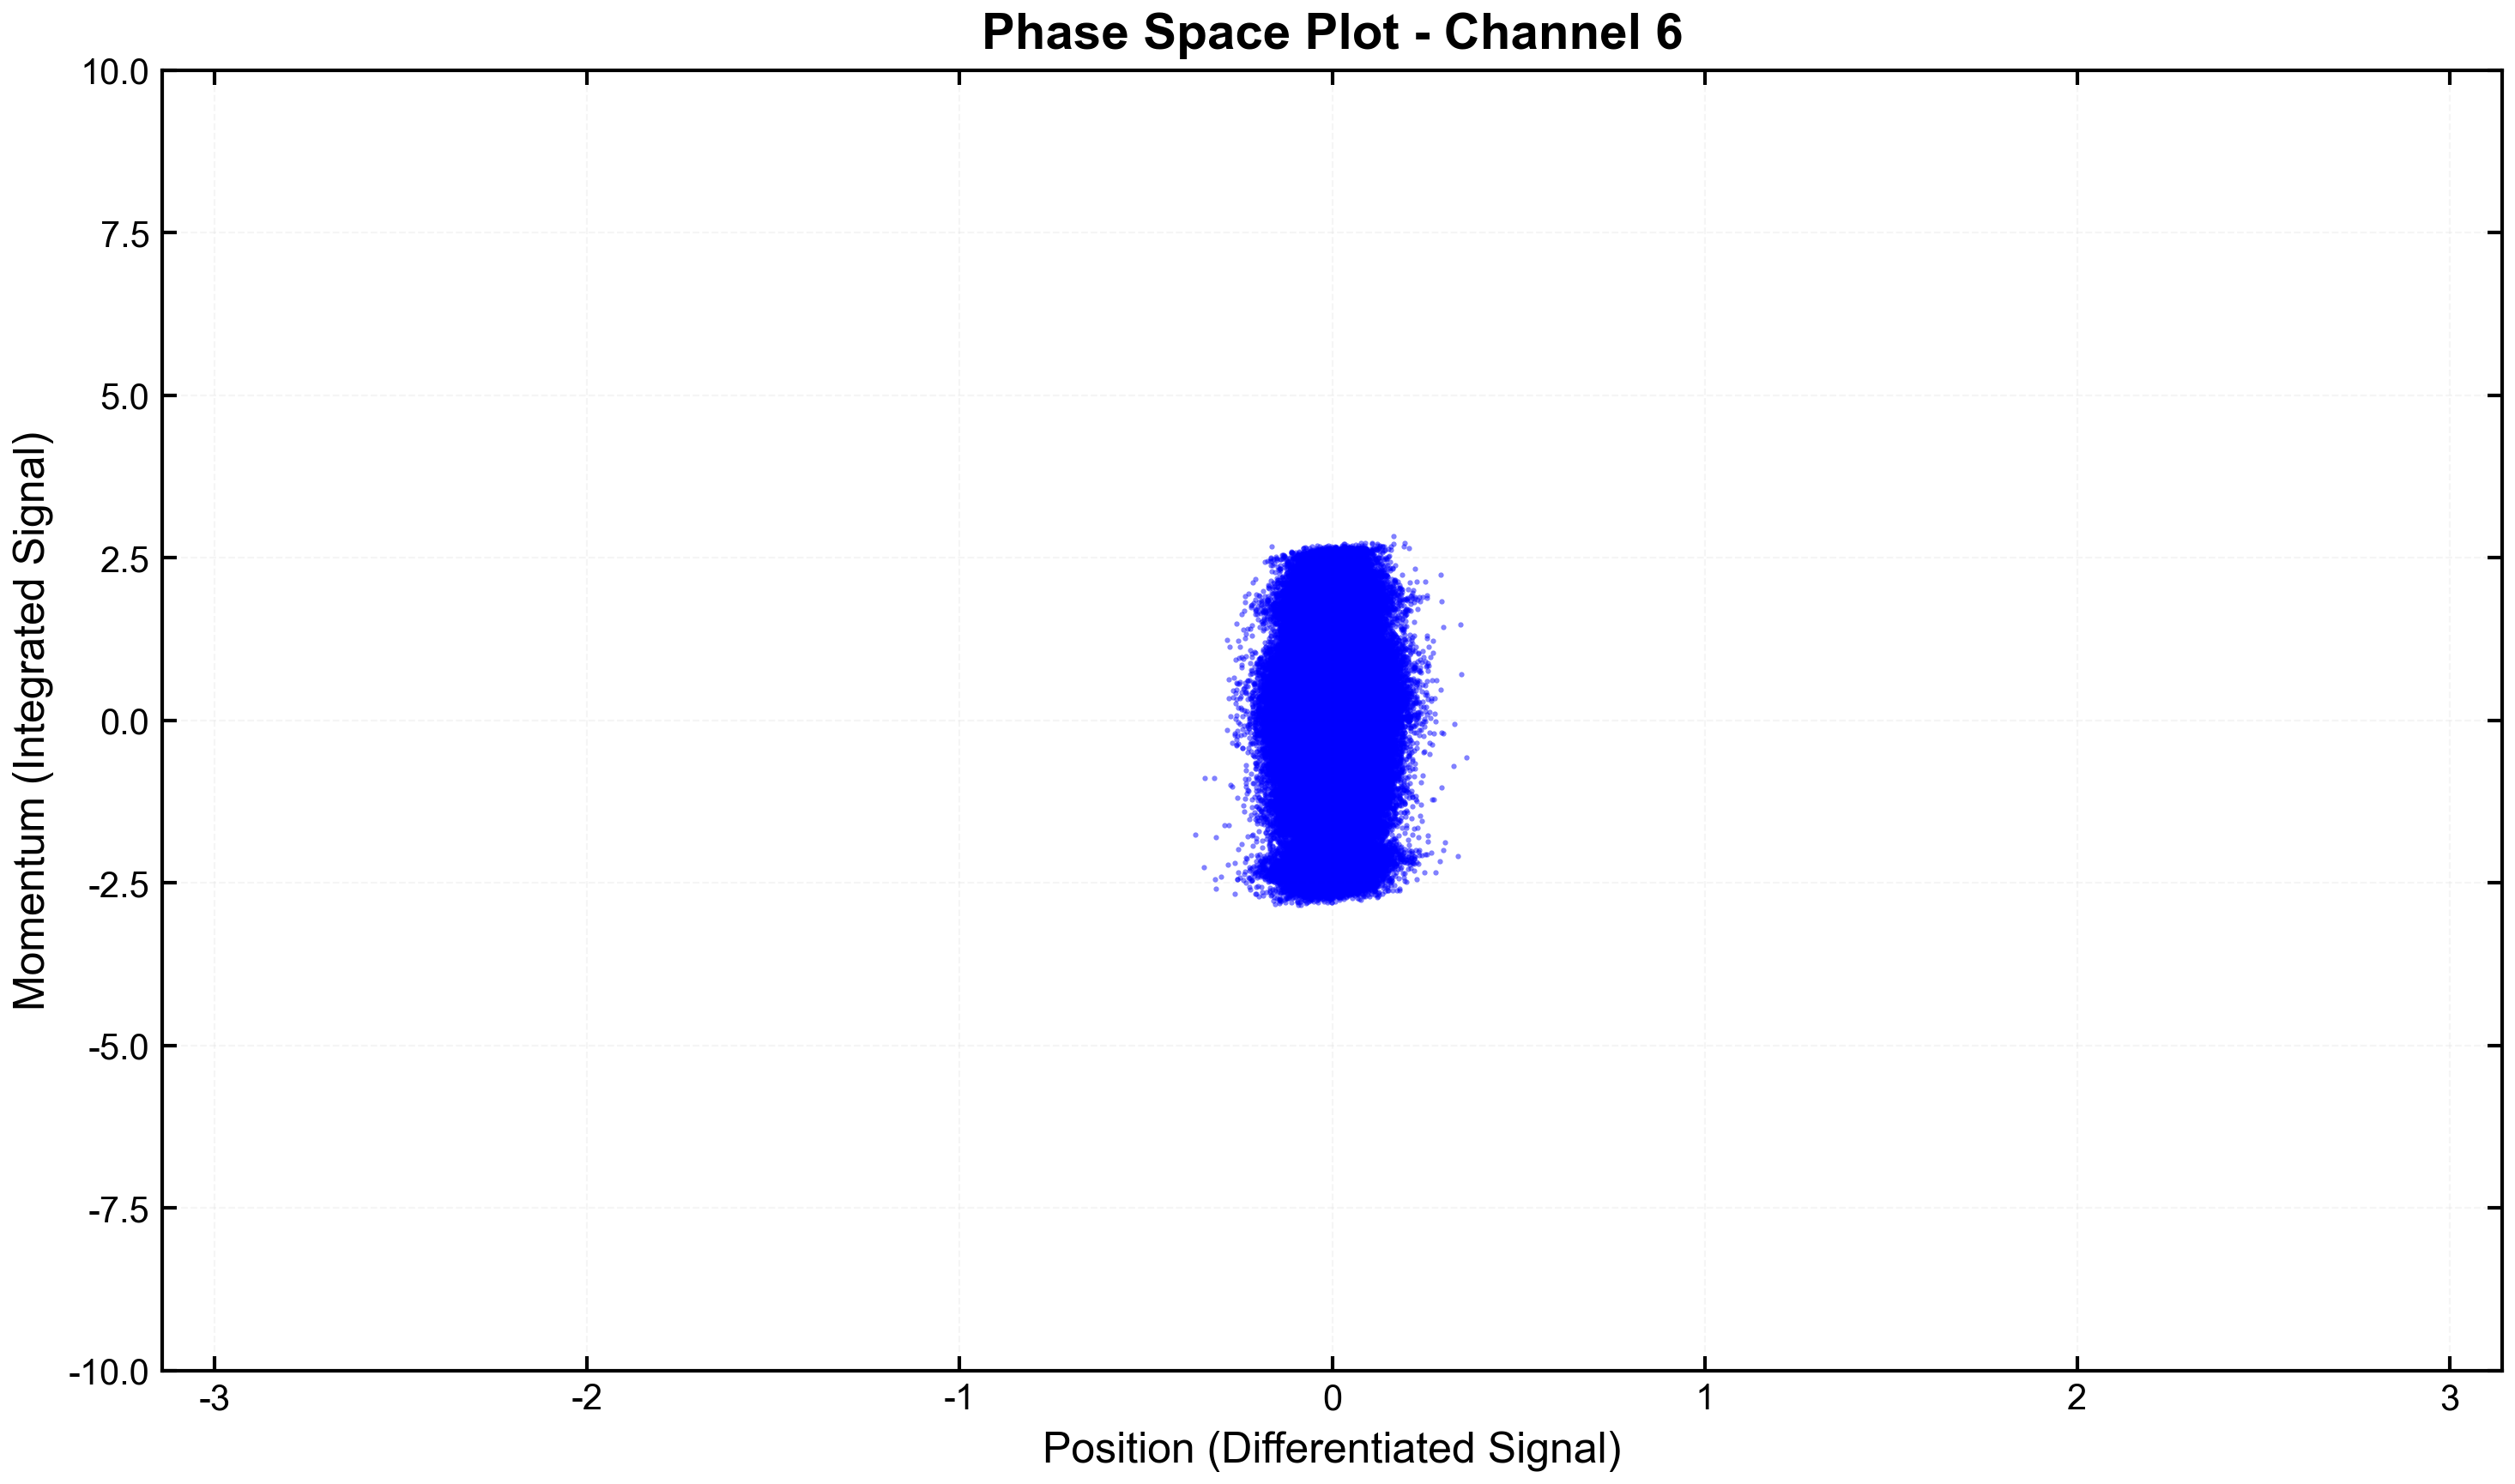

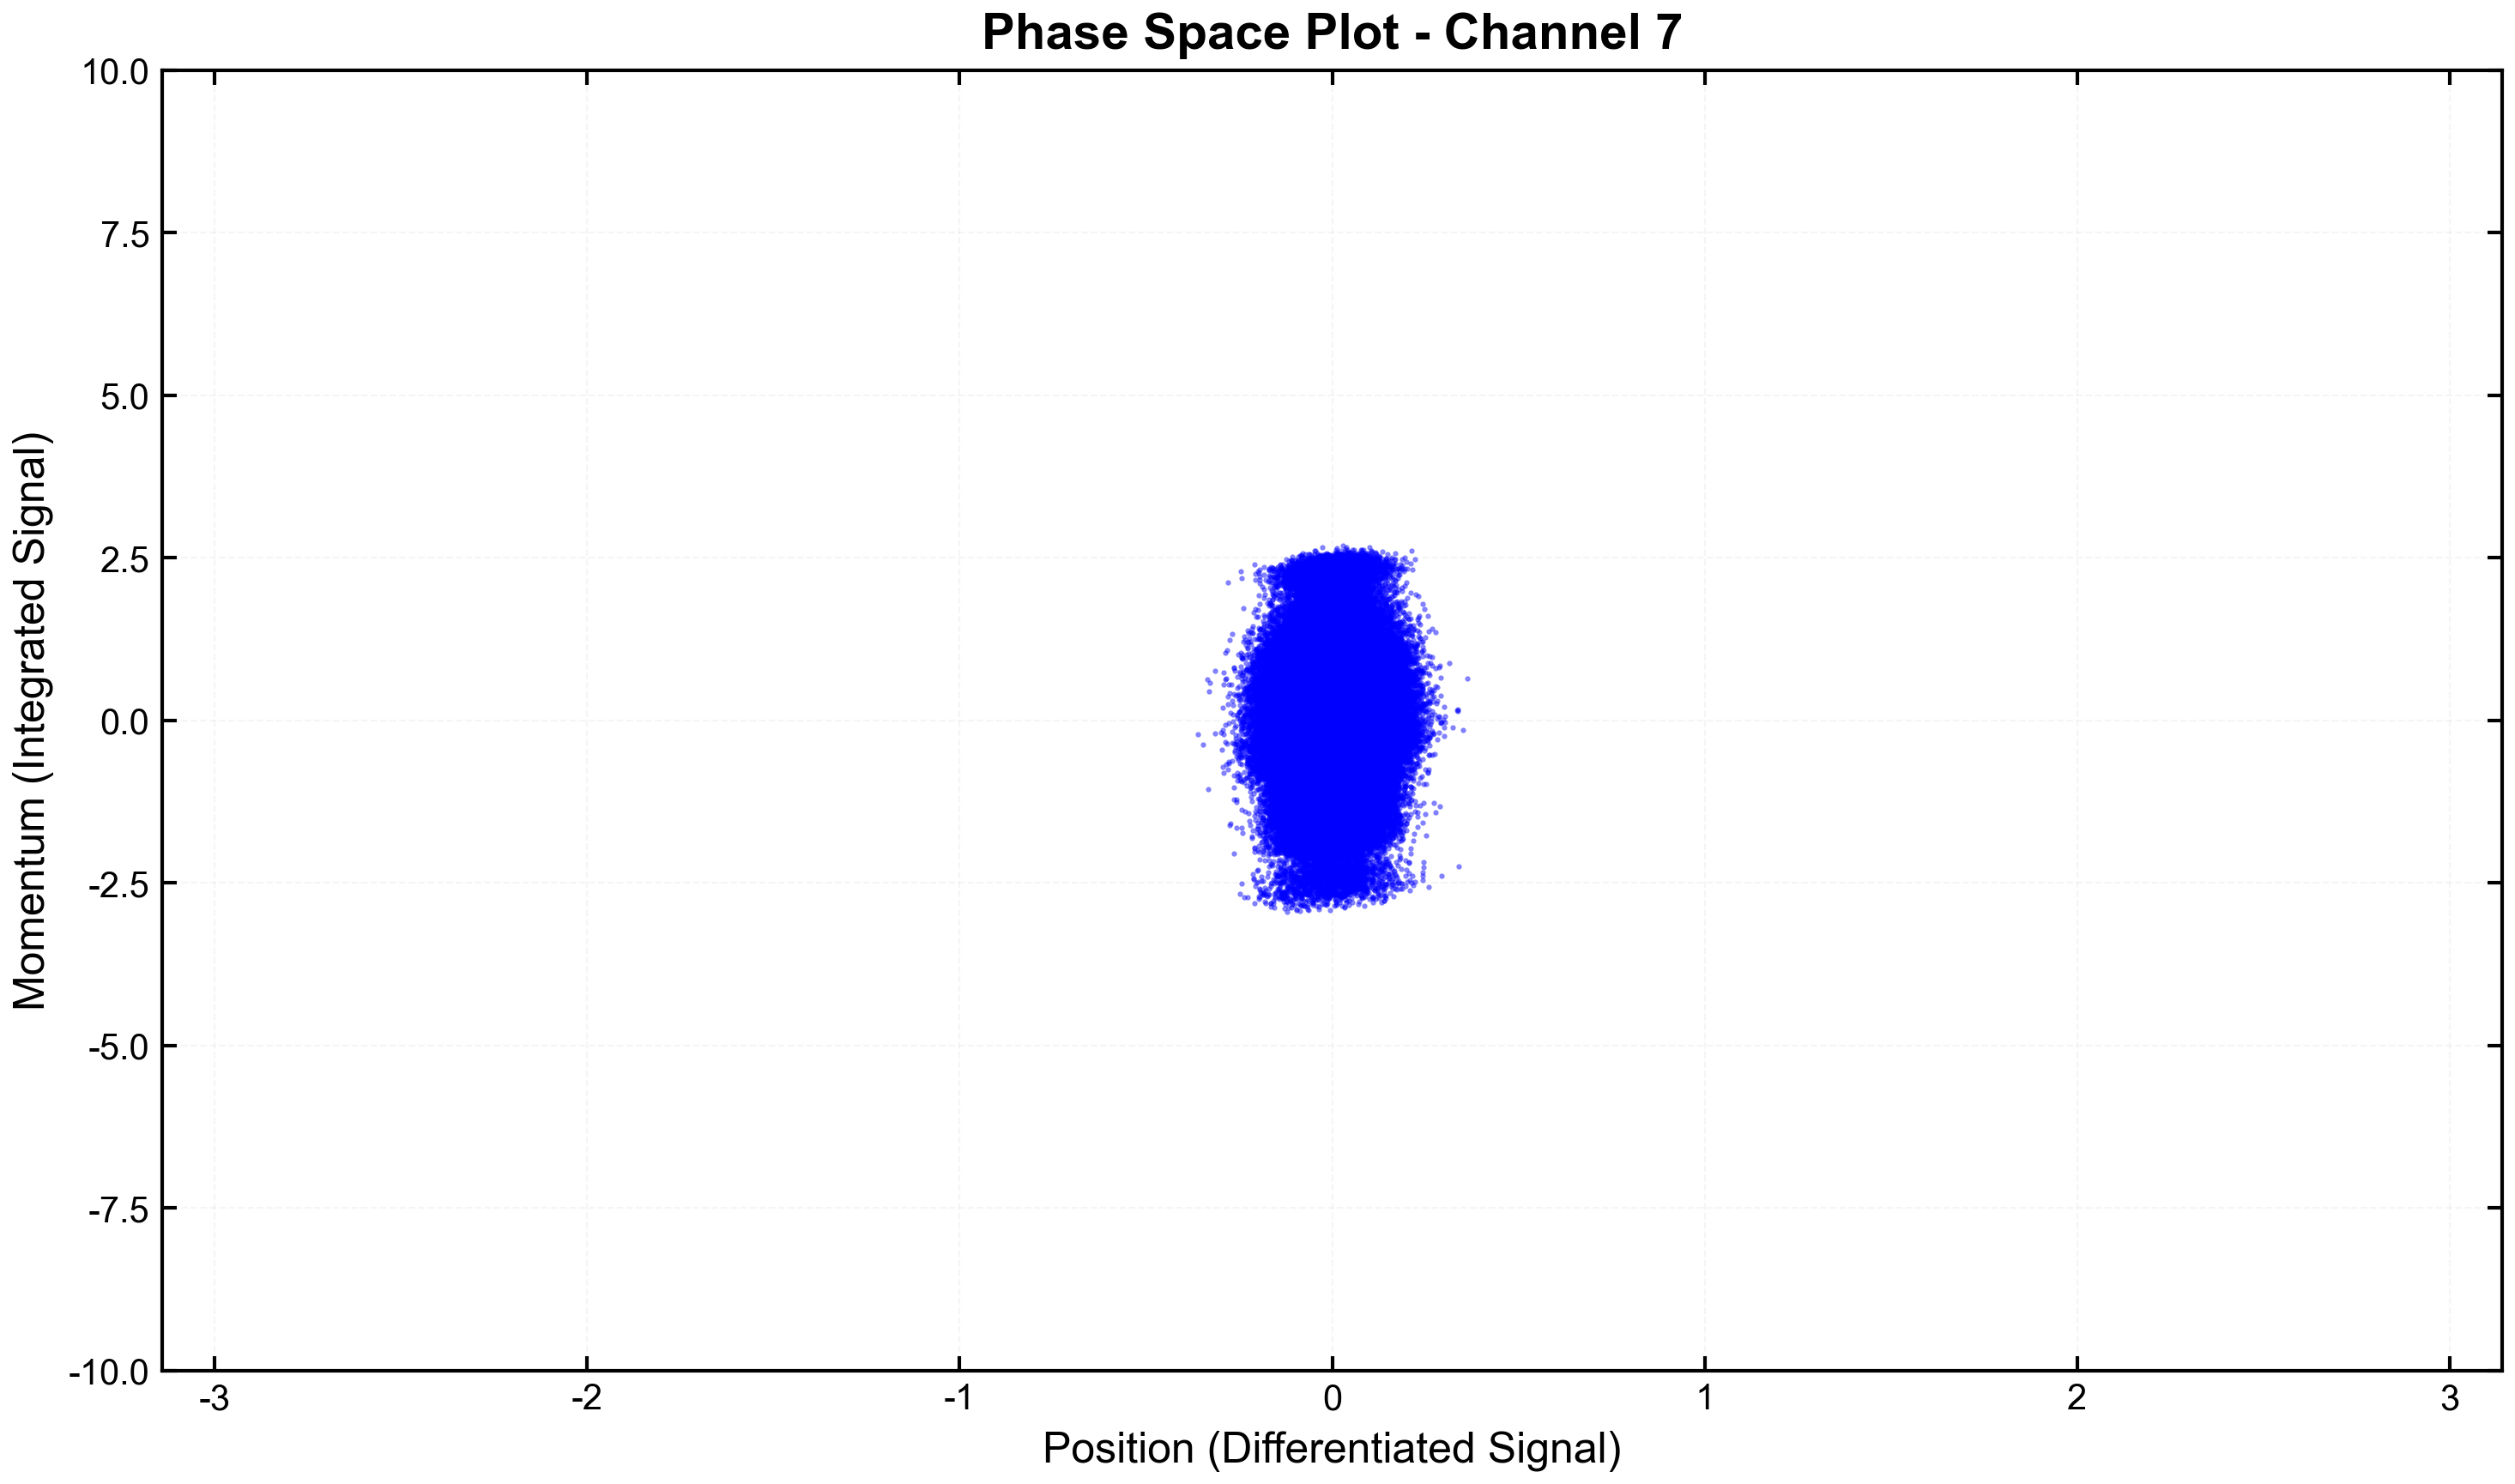

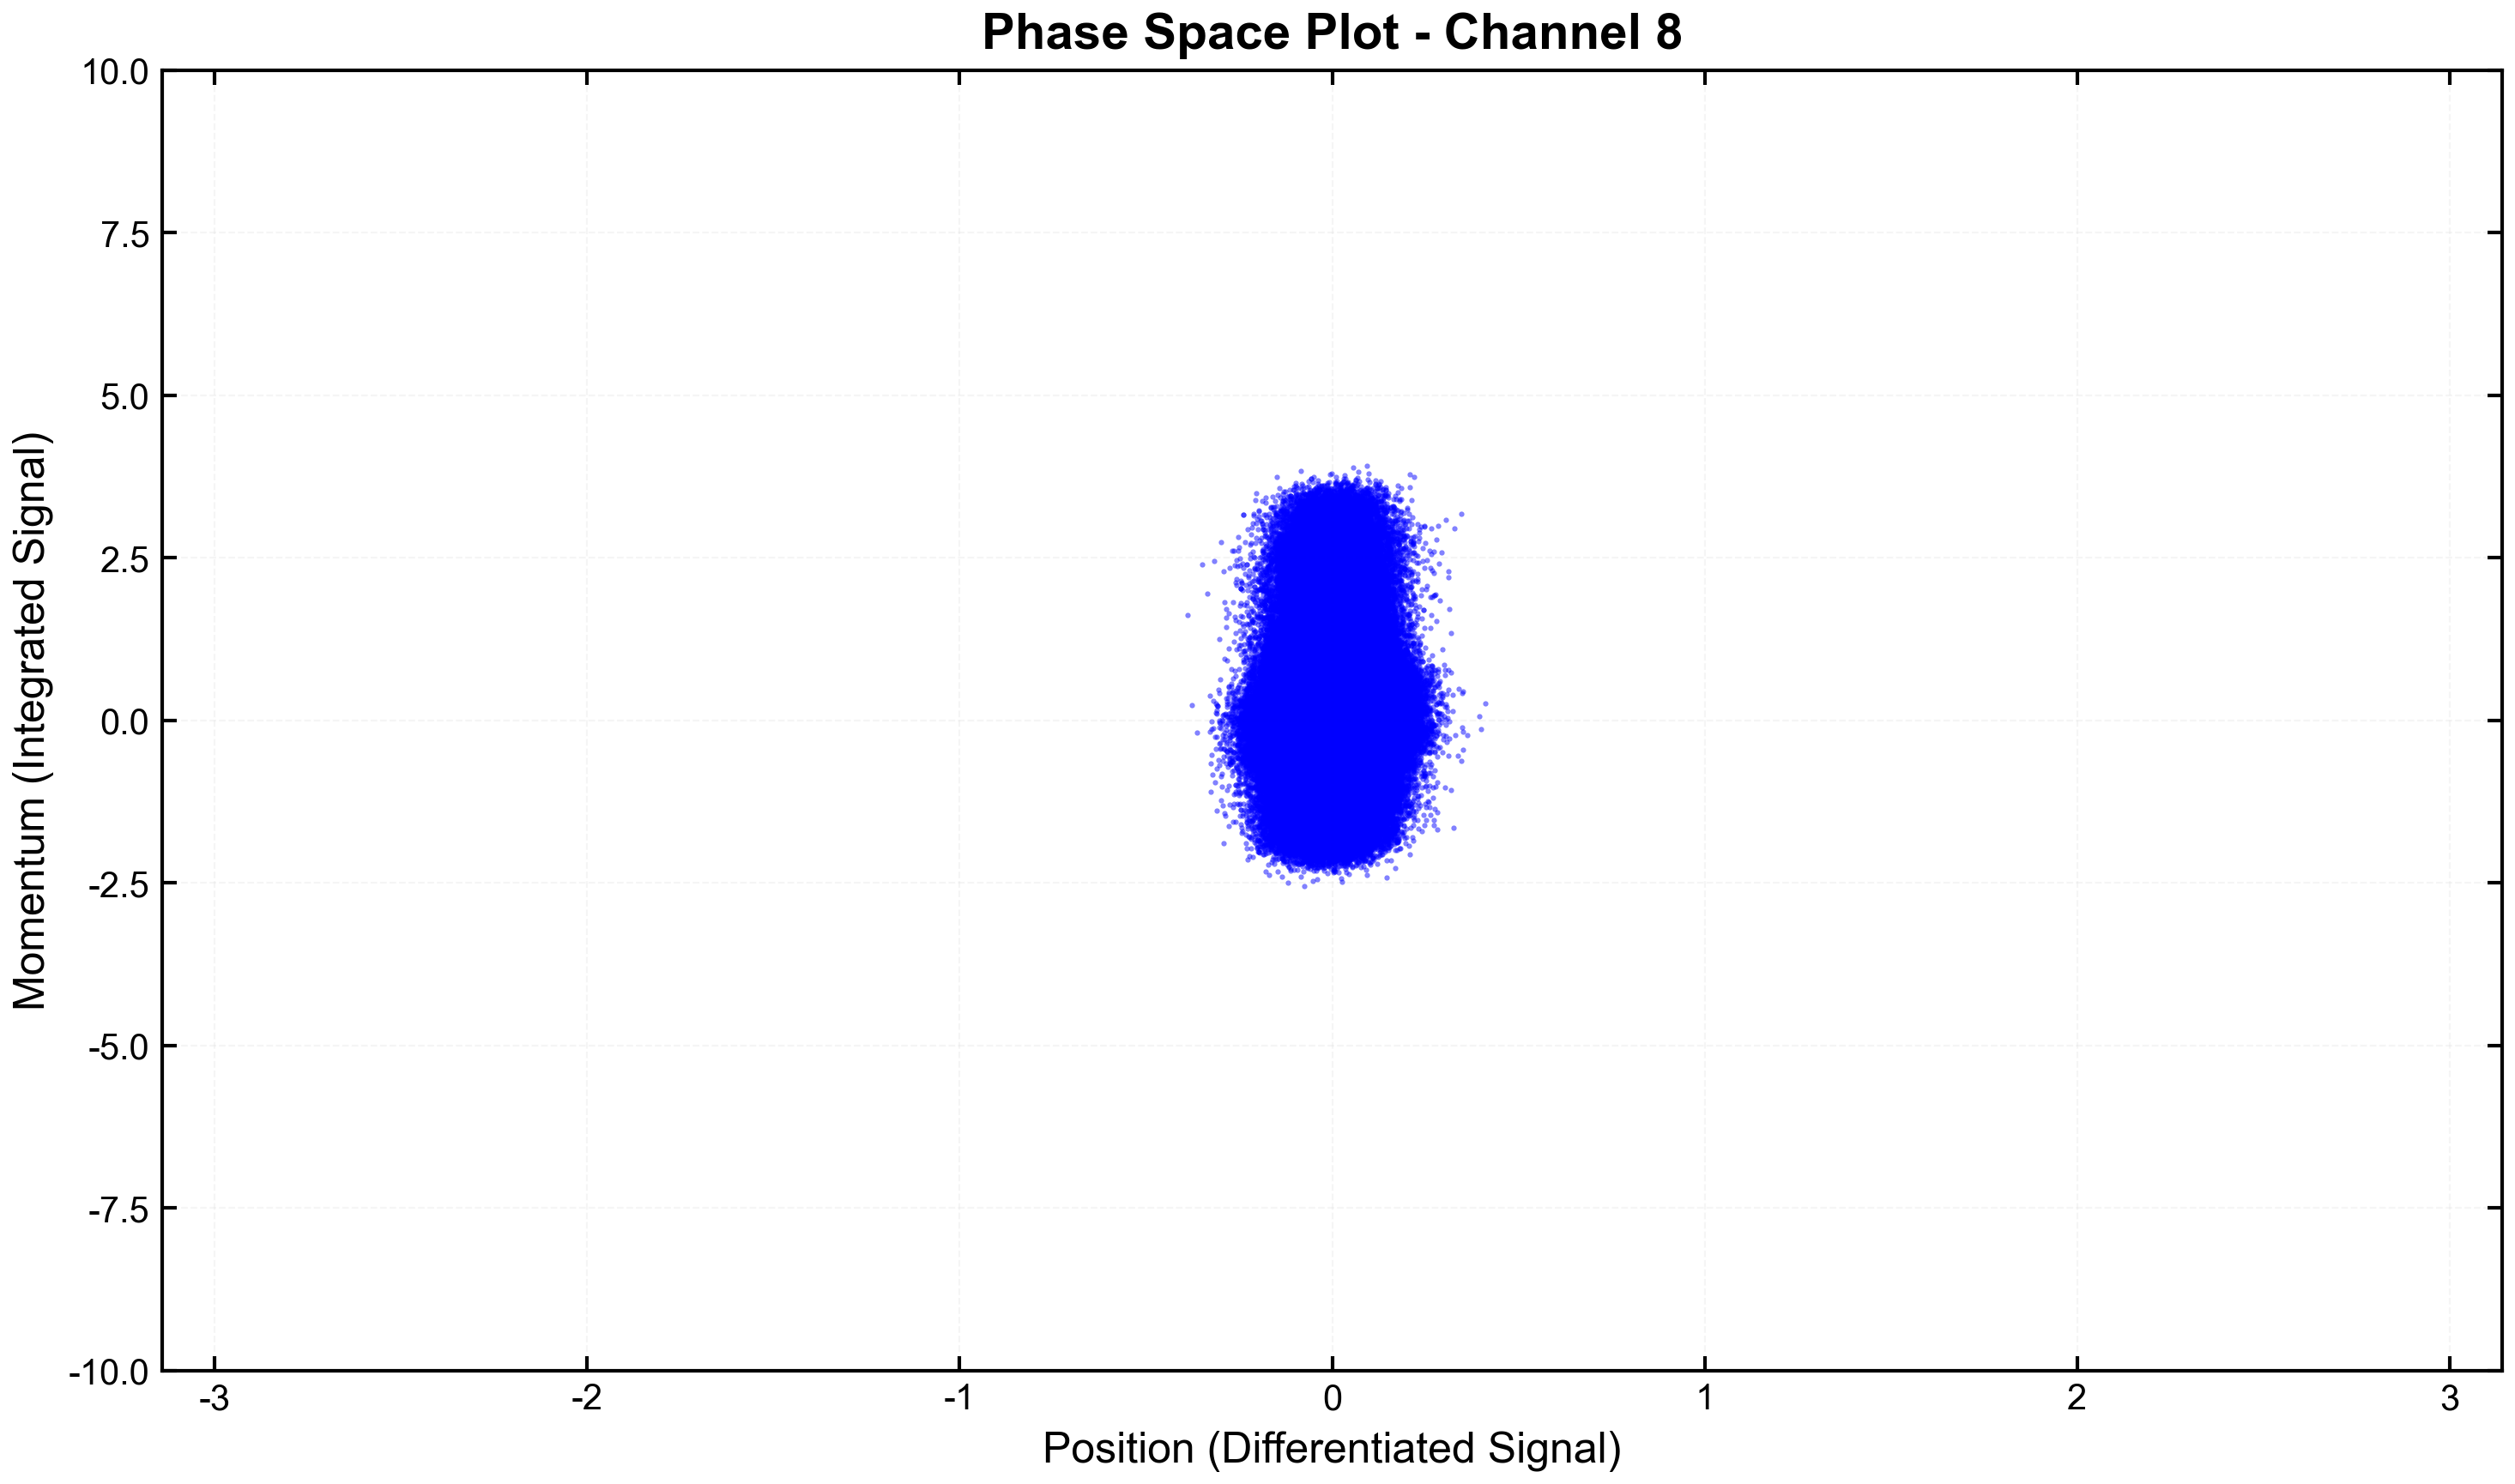

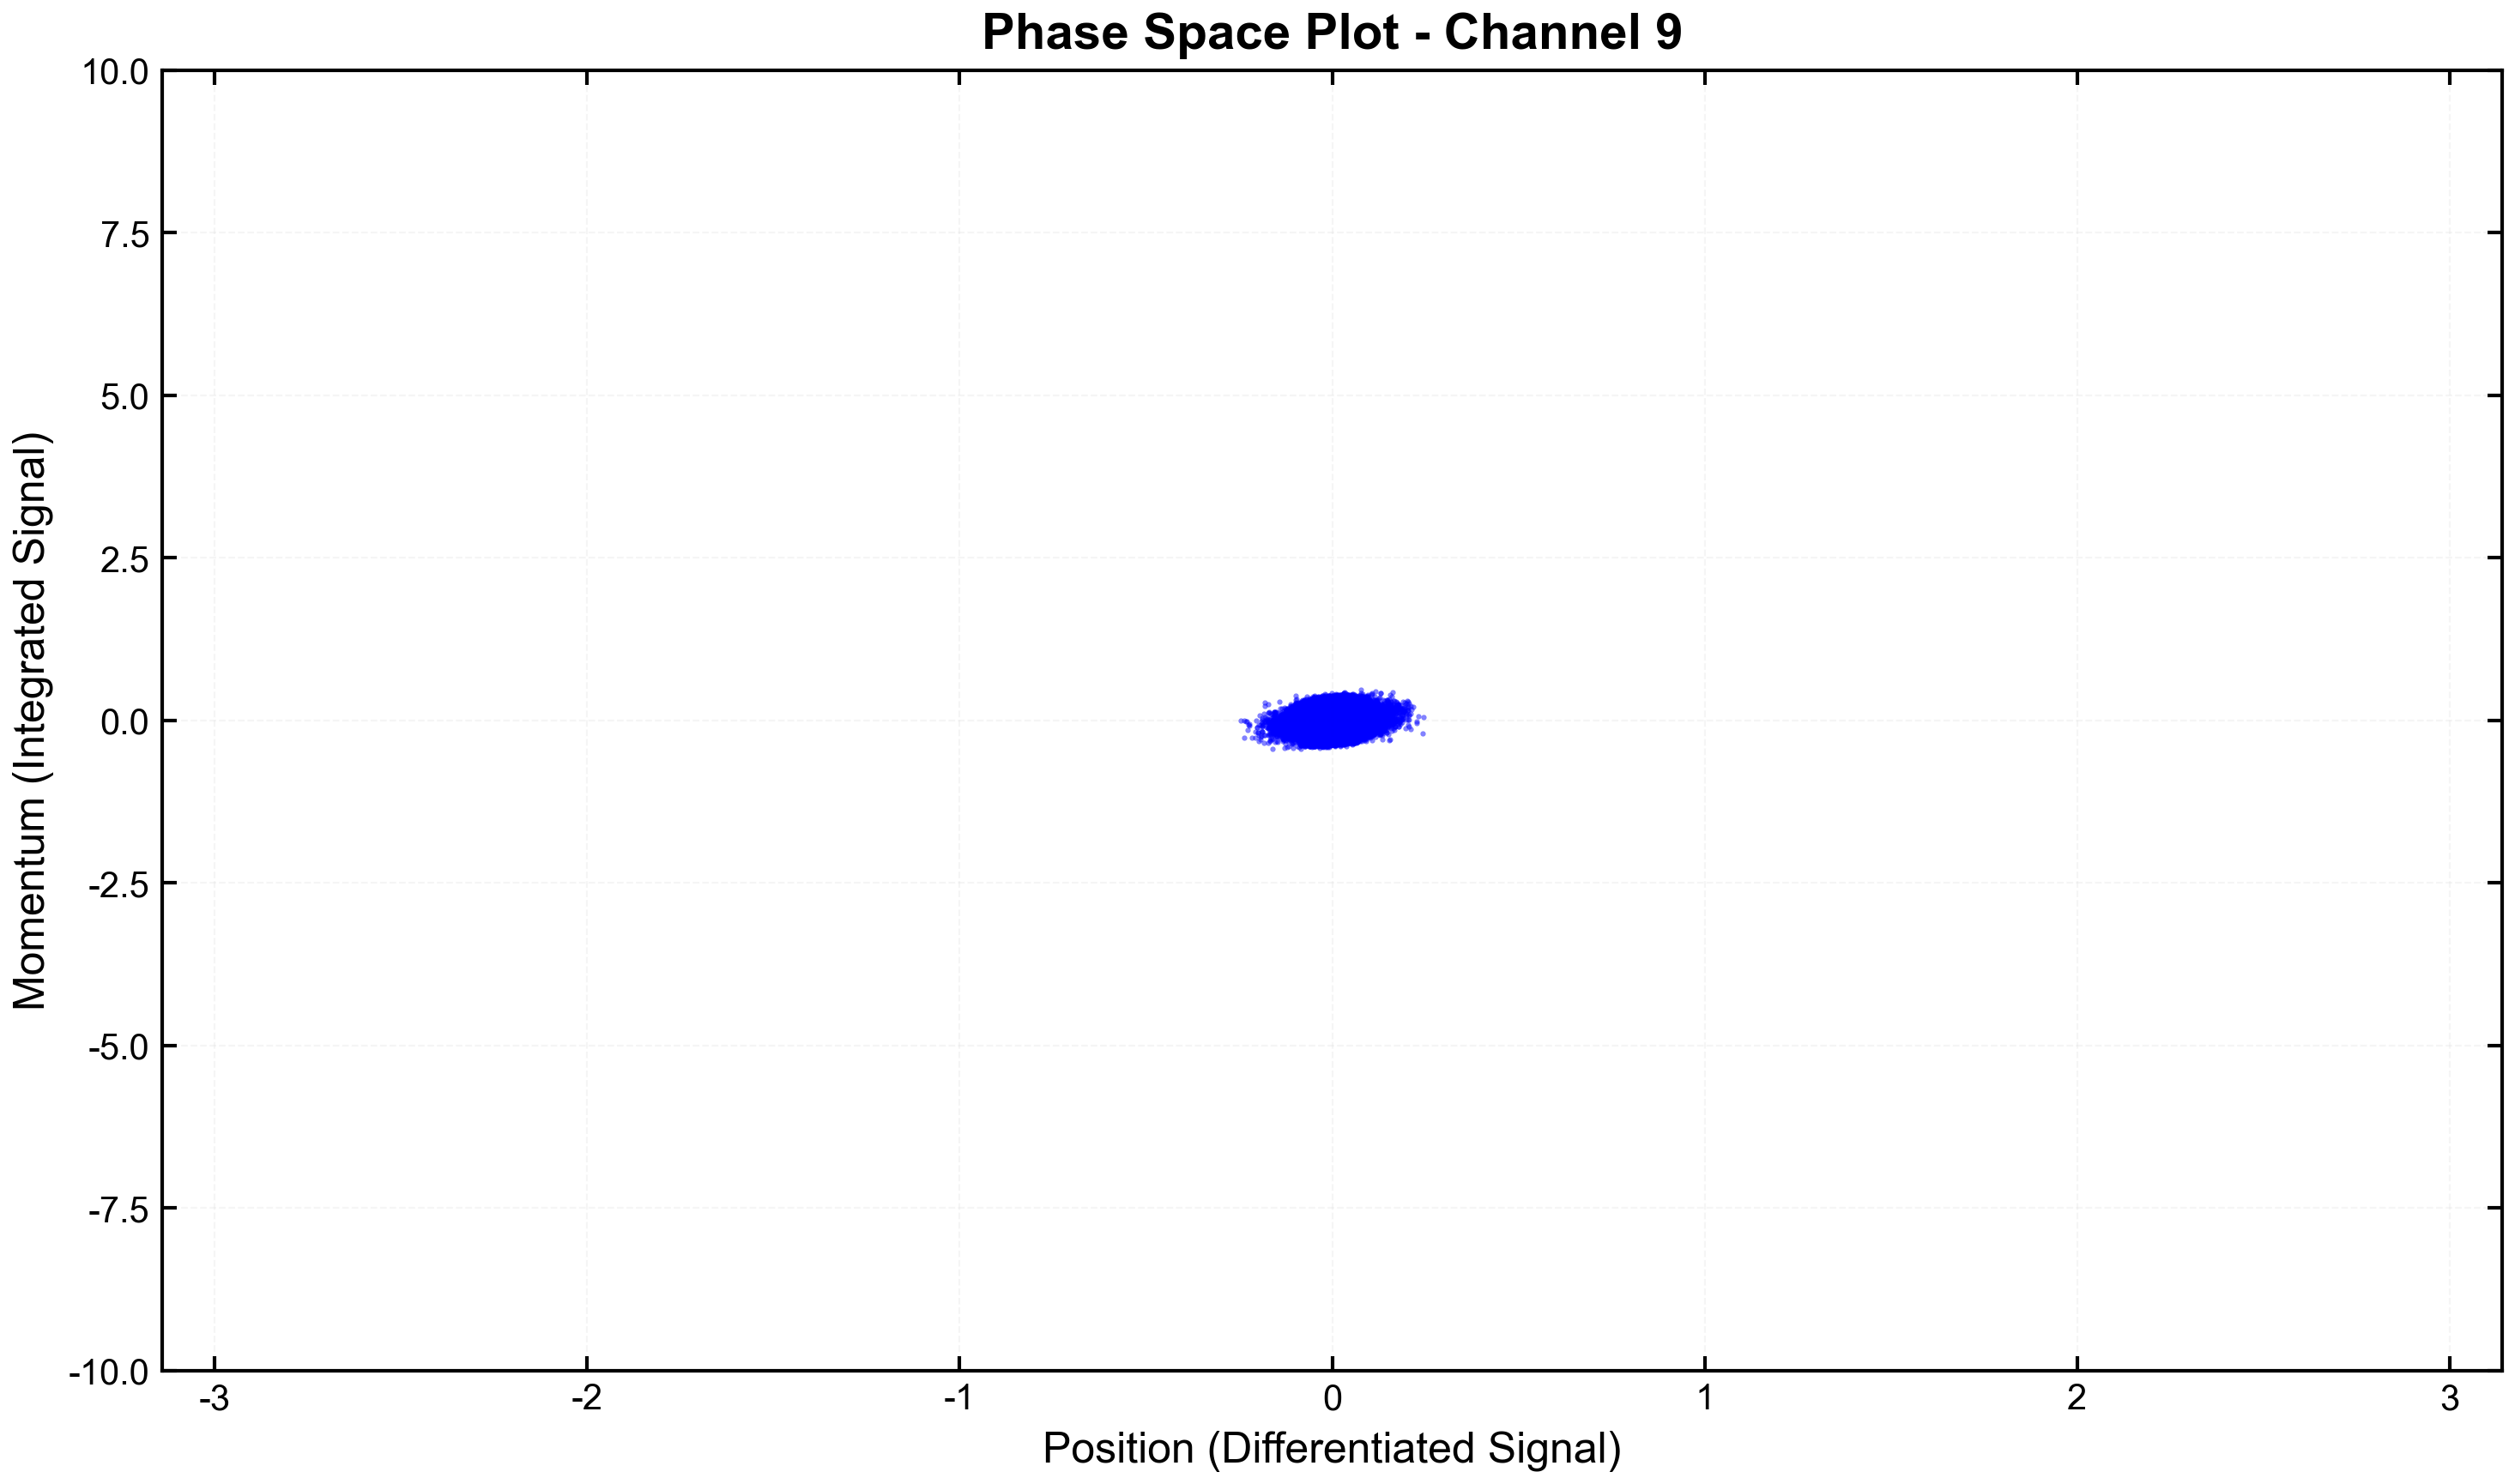

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

# 确保figs文件夹存在
if not os.path.exists("figs"):
    os.makedirs("figs")

# 获取通道数量
# num_channels = int_data.shape[1]
num_channels = 10

# 打印数据形状
print(f"数据形状: {int_data.shape}")
print(f"通道数量: {num_channels}")

# 计算所有通道数据的范围，以便统一坐标轴
# q_all = diff_data.flatten()
# p_all = int_data.flatten()
# q_min, q_max = q_all.min(), q_all.max()
# p_min, p_max = p_all.min(), p_all.max()
q_min, q_max = -np.pi, np.pi
p_min, p_max = -10, 10

# 为所有通道创建一个大图
fig = plt.figure(figsize=(30, 18))

# 循环遍历所有通道
for channel_id in range(num_channels):
    # 获取积分数据和差分数据作为相空间的两个维度
    q = diff_data[:, channel_id]  # （差分数据）
    p = int_data[:, channel_id]  # （积分数据）

    # 在相空间中可视化信号
    ax = plt.subplot(2, (num_channels + 1) // 2, channel_id + 1)
    ax.plot(q, p, "b.", alpha=0.5, markersize=1)
    ax.set_title(f"Phase Space Plot - Channel {channel_id}")
    ax.set_xlabel("Position (Differentiated Signal)")
    ax.set_ylabel("Momentum (Integrated Signal)")
    ax.grid(True, alpha=0.3)

    # 设置统一的坐标轴范围
    ax.set_xlim(q_min, q_max)
    ax.set_ylim(p_min, p_max)

# 调整子图布局
plt.tight_layout()

# 保存图像到figs文件夹
plt.savefig("figs/phase_space_all_channels.png", dpi=300)

# 显示图像
plt.show()

# 为每个通道单独创建和保存图像
for channel_id in range(num_channels):
    plt.figure(figsize=(10, 6))

    # 获取积分数据和差分数据
    q = diff_data[:, channel_id]
    p = int_data[:, channel_id]

    # 绘制相空间图
    plt.plot(q, p, "b.", alpha=0.5, markersize=1)
    plt.title(f"Phase Space Plot - Channel {channel_id}")
    plt.xlabel("Position (Differentiated Signal)")
    plt.ylabel("Momentum (Integrated Signal)")
    plt.grid(True, alpha=0.3)

    # 设置统一的坐标轴范围
    plt.xlim(q_min, q_max)
    plt.ylim(p_min, p_max)

    # 保存单个通道图像
    plt.savefig(f"figs/phase_space_channel_{channel_id}.png", dpi=300)
    plt.show()


In [20]:
import os

import matplotlib.pyplot as plt
import numpy as np


def plot_phase_space(
    pos_data: np.ndarray,  # 修改: int_data -> pos_data
    mom_data: np.ndarray,  # 修改: diff_data -> mom_data
    output_dir: str = "figs",
    plot_combined: bool = True,
    plot_individual: bool = True,
    q_range: tuple[float, float] | None = None,
    p_range: tuple[float, float] | None = None,
) -> None:
    """
    绘制并保存一个或多个通道的相空间图。

    Args:
        pos_data: 位置数据 q (例如，积分信号)，形状为 [时间步数, 通道数]。 # 修改: 更新描述
        mom_data: 动量数据 p (例如，差分信号)，形状为 [时间步数, 通道数]。 # 修改: 更新描述
        output_dir: 保存图像的目录路径。如果目录不存在，则会自动创建。
        plot_combined: 是否绘制并保存包含所有通道子图的组合图像。
        plot_individual: 是否为每个通道单独绘制并保存图像。
        q_range: q 轴 (Position) 的显示范围 (min, max)。如果为 None, 则自动计算范围。
        p_range: p 轴 (Momentum) 的显示范围 (min, max)。如果为 None, 则自动计算范围。
    """
    # 检查输入数据形状是否匹配
    if pos_data.shape != mom_data.shape:  # 修改: 更新变量名
        raise ValueError(
            f"Input data shapes mismatch: pos_data {pos_data.shape},"  # 修改: 更新变量名
            f" mom_data {mom_data.shape}"  # 修改: 更新变量名
        )

    num_channels = pos_data.shape[1]  # 修改: 使用 pos_data 获取通道数
    print(f"Data shape: {pos_data.shape}")  # 修改: 更新变量名
    print(f"Number of channels: {num_channels}")

    # 确保输出目录存在
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created output directory: {output_dir}")

    # 确定坐标轴范围
    if q_range is None:
        q_min, q_max = pos_data.min(), pos_data.max()  # 修改: q 范围来自 pos_data
    else:
        q_min, q_max = q_range

    if p_range is None:
        p_min, p_max = mom_data.min(), mom_data.max()  # 修改: p 范围来自 mom_data
    else:
        p_min, p_max = p_range

    # --- 绘制并保存组合图 ---
    if plot_combined:
        num_rows = 2
        num_cols = (num_channels + num_rows - 1) // num_rows
        fig_width = 6 * num_cols
        fig_height = 5 * num_rows

        fig, axes = plt.subplots(
            num_rows, num_cols, figsize=(fig_width, fig_height), squeeze=False
        )
        axes_flat = axes.flatten()

        for channel_id in range(num_channels):
            ax = axes_flat[channel_id]
            # 修改: 交换 q 和 p 的数据来源
            q = pos_data[:, channel_id]
            p = mom_data[:, channel_id]

            ax.plot(q, p, "b.", alpha=0.5, markersize=1)
            ax.set_title(f"Phase Space - Channel {channel_id}")
            # 修改: 更新坐标轴标签
            ax.set_xlabel("Position (Integrated Signal)")
            ax.set_ylabel("Momentum (Differentiated Signal)")
            ax.grid(True, alpha=0.3)
            ax.set_xlim(q_min, q_max)
            ax.set_ylim(p_min, p_max)

        # 隐藏未使用的子图
        for i in range(num_channels, num_rows * num_cols):
            axes_flat[i].set_visible(False)

        plt.tight_layout()
        save_path_combined = os.path.join(output_dir, "phase_space_all_channels.png")
        plt.savefig(save_path_combined, dpi=300)
        print(f"Combined plot saved to: {save_path_combined}")
        plt.close(fig)


In [25]:
# 读取原始数据 - 在优化后的API中，target_col是一个可选参数，用于选择特定的列
target_cols = list(range(10))  # 从0到20的列 (如果需要0-20这21列)

# 读取原始数据
raw_data = data_reader.ReadRawData(dat_path, target_col=target_cols)

# 使用处理器获取差分和积分数据
p = data_processor.ProcessDifferential(raw_data)
p -= np.mean(p, axis=0, keepdims=True)

q = data_processor.IntegrateData(p)
q -= np.mean(q, axis=0, keepdims=True)

# 调用函数，使用默认参数绘制所有图
plot_phase_space(q, p)

# 调用函数，只绘制组合图，并指定坐标轴范围
plot_phase_space(
    p,
    q,
    plot_individual=False,
    p_range=(-np.pi, np.pi),
    q_range=(-10, 10),
)

# 调用函数，只绘制单个通道图，并保存到指定目录
plot_phase_space(q, p, output_dir="my_phase_plots", plot_combined=False)


Data shape: (900000, 10)
Number of channels: 10
Combined plot saved to: figs/phase_space_all_channels.png
Individual plot for channel 0 saved to: figs/phase_space_channel_0.png
Individual plot for channel 1 saved to: figs/phase_space_channel_1.png
Individual plot for channel 2 saved to: figs/phase_space_channel_2.png
Individual plot for channel 3 saved to: figs/phase_space_channel_3.png
Individual plot for channel 4 saved to: figs/phase_space_channel_4.png
Individual plot for channel 5 saved to: figs/phase_space_channel_5.png
Individual plot for channel 6 saved to: figs/phase_space_channel_6.png
Individual plot for channel 7 saved to: figs/phase_space_channel_7.png
Individual plot for channel 8 saved to: figs/phase_space_channel_8.png
Individual plot for channel 9 saved to: figs/phase_space_channel_9.png
Data shape: (900000, 10)
Number of channels: 10
Combined plot saved to: figs/phase_space_all_channels.png
Data shape: (900000, 10)
Number of channels: 10
Individual plot for channel 0 